 # 🏡 **Ames Housing Price Prediction: A Complete End-to-End Regression Project**
---

> This notebook documents the full journey of building a **machine learning model** to predict **house sale prices** in Ames, Iowa.  
>  
> It covers every stage — from **data exploration and preprocessing**, to **feature engineering, visualization, model training, evaluation**, and **explainability** using SHAP.  
>  
> The project’s objective is to **predict `SalePrice`** based on 79 features describing the physical and qualitative aspects of residential properties.

---

## 📘 **1. Introduction and Problem Overview**

> The **Ames Housing Dataset** is a modern, well-structured dataset often used for regression modeling.  
> Ames provides **diverse categorical and numerical variables** describing nearly every property characteristic — from basement type to roof material.  
>  
> The goal of this notebook is to create a **robust, interpretable regression model** that can predict house prices accurately and explain the influence of key property features.

**Objectives:**
- Perform thorough **Exploratory Data Analysis (EDA)**.  
- Engineer and transform features to improve model performance.  
- Compare multiple regression algorithms.  
- Tune hyperparameters for the best model.  
- Interpret the final model using **SHAP** and **feature importance plots**.

---

## 📦 **2. Data Loading and Initial Inspection**

> The dataset is loaded using `pandas` and explored for its dimensions, structure, and key statistics.  
>  
> - The training data consists of **1460 observations** and **79 explanatory variables**.  
> - Each feature describes various aspects like **lot area, quality ratings, garage, basement, and year built**.  
> - The target variable is **`SalePrice`**.  

Here we check:
- Shape of the dataset  
- Data types of each column  
- Basic descriptive statistics  
- Preview of a few rows (`.head()`) to understand the structure

---

In [5]:
#Starting with importing our base Dataset (Ames Housing)
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
#Identify missing data
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
MSZoning          0
LotArea           0
Street            0
LotShape          0
Id                0
Length: 81, dtype: int64

In [9]:
df.Id.is_unique

True

In [10]:
# As we can see that the Id feature in the data set is just and identifier and it wont contribute anything 
# in the prediction of the sale price so we are going to remove it

df = df.drop('Id', axis=1)

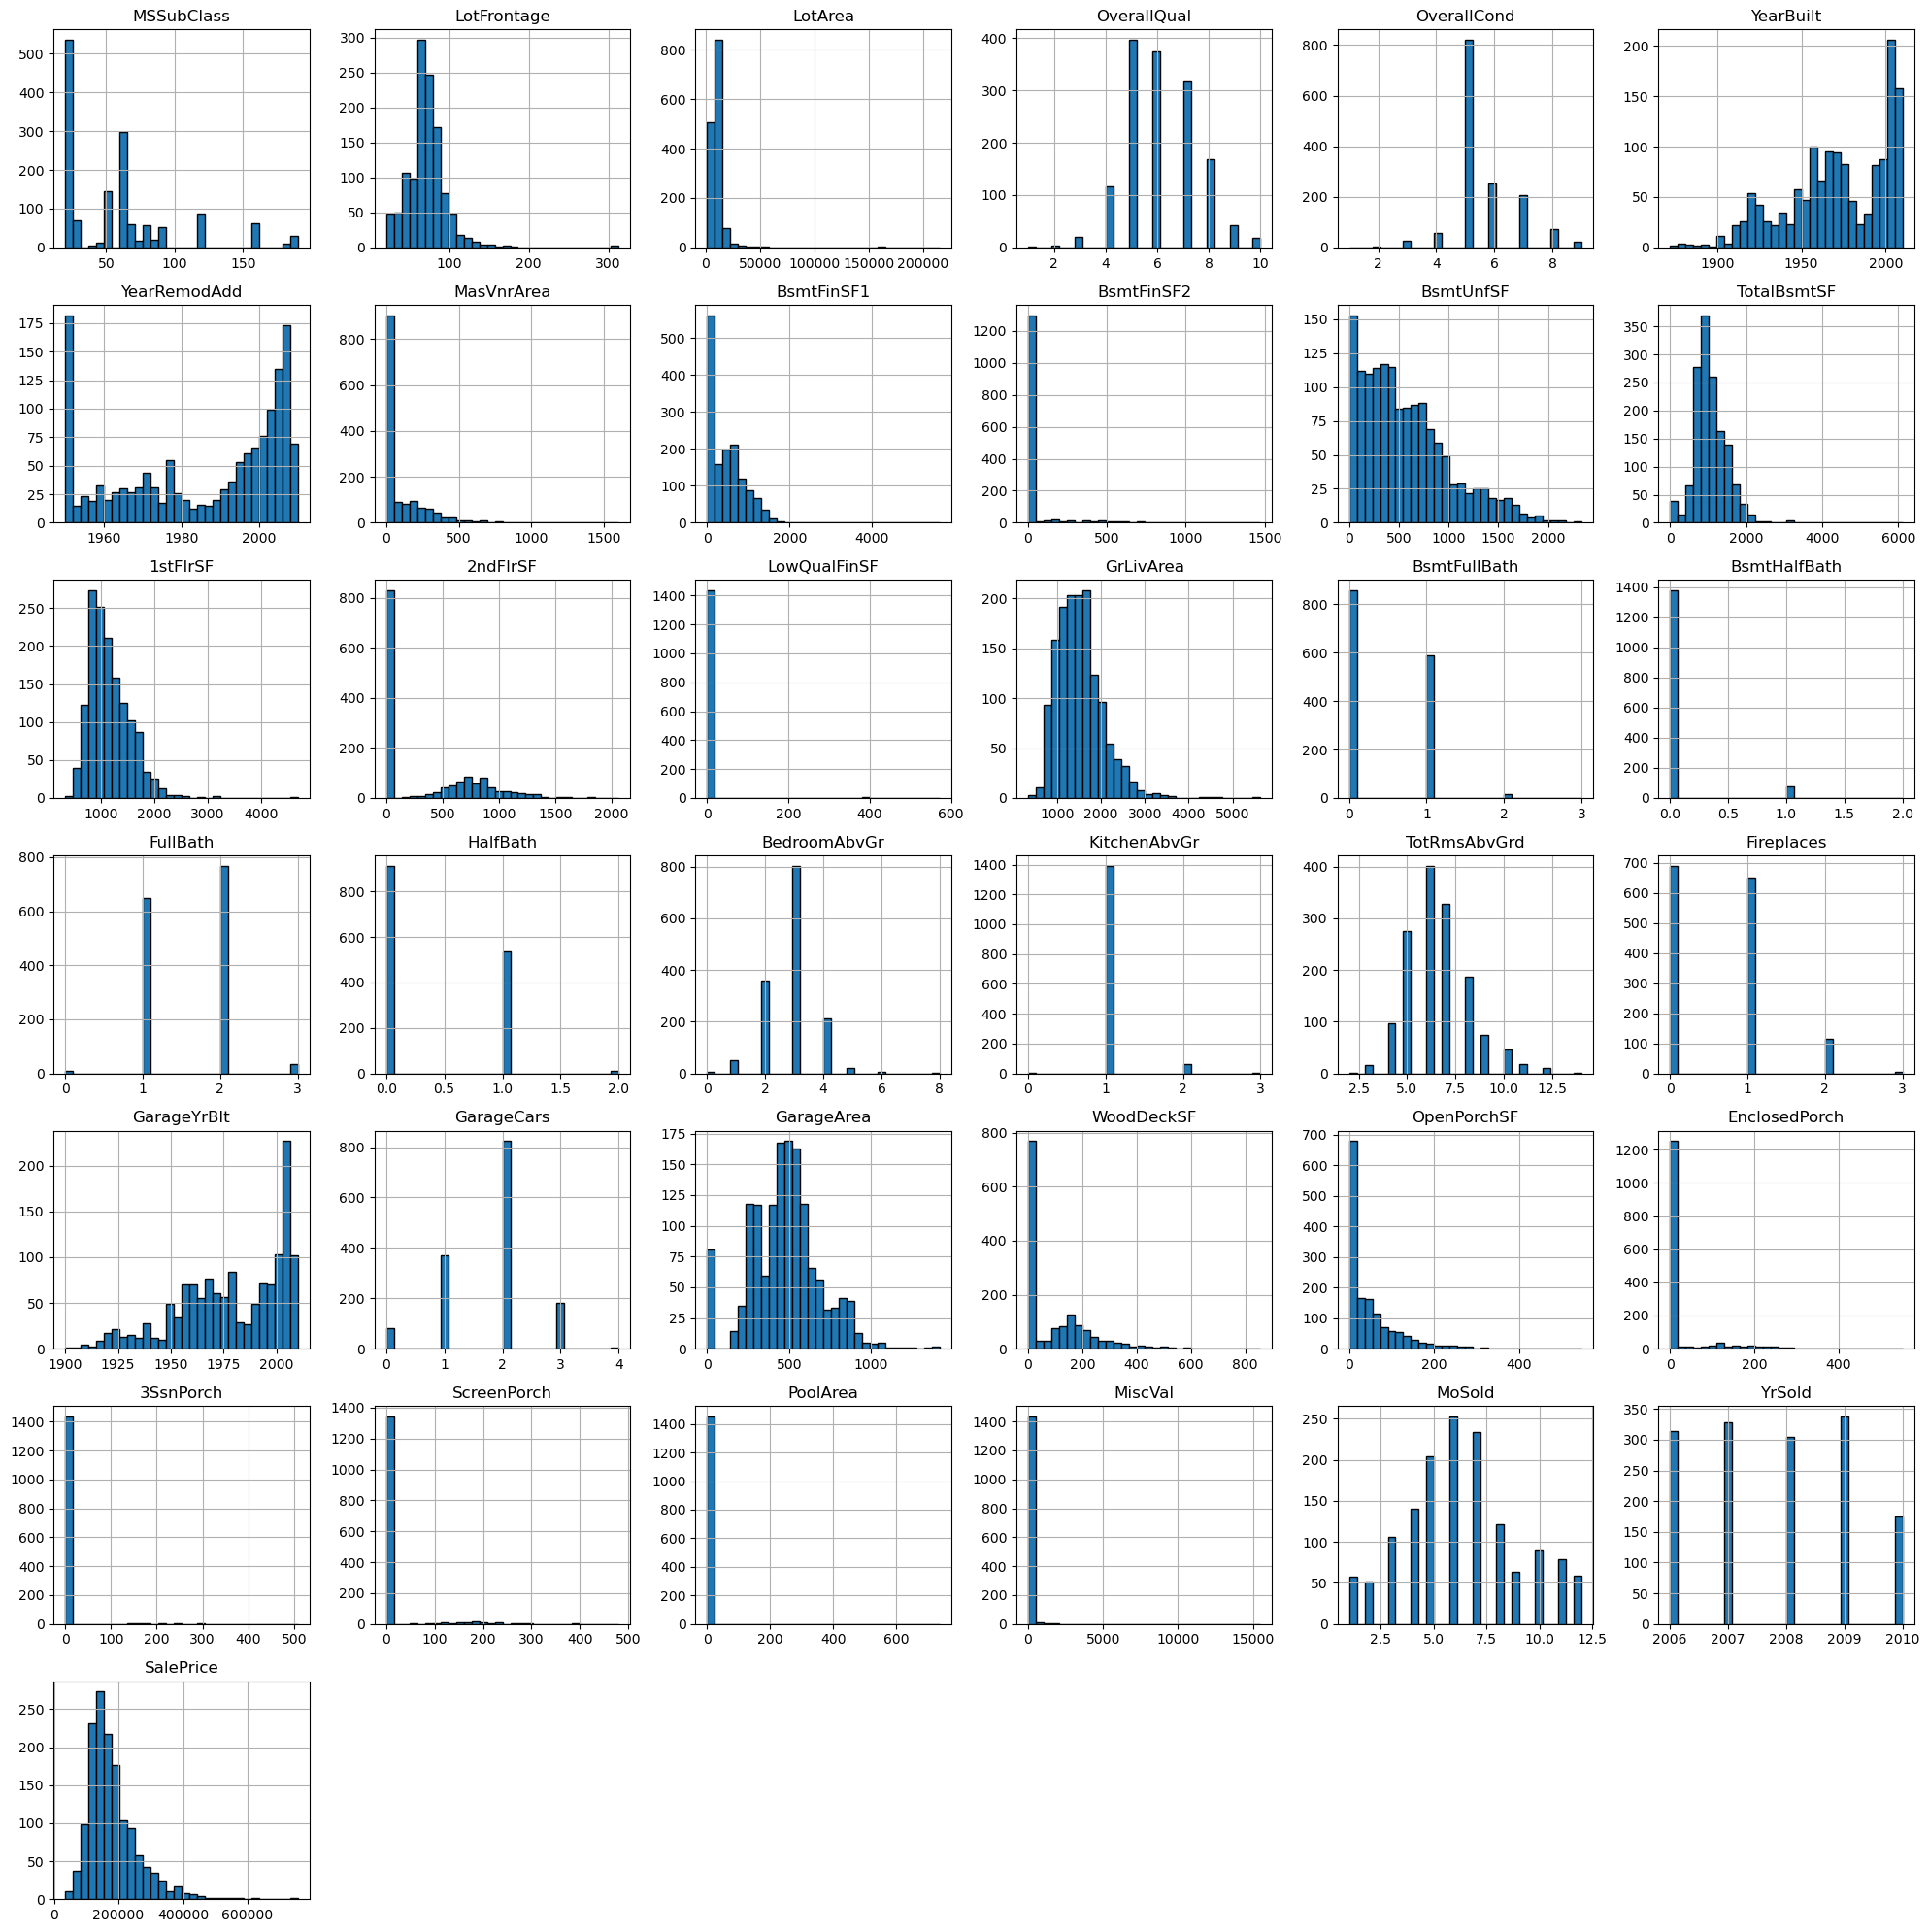

In [11]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

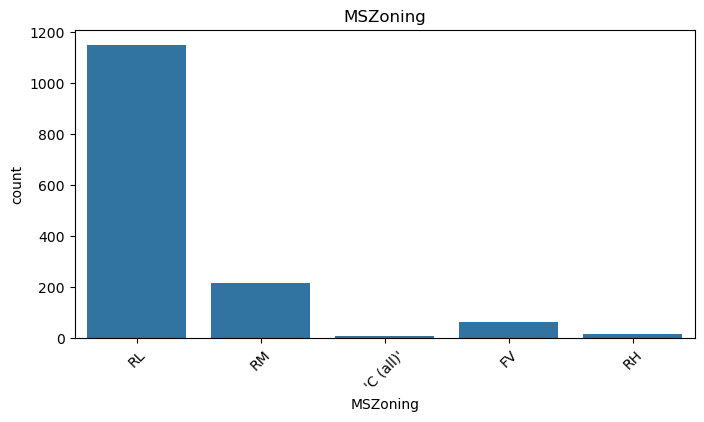

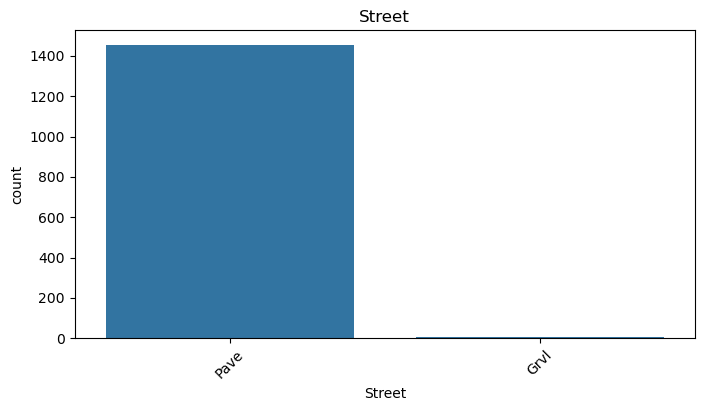

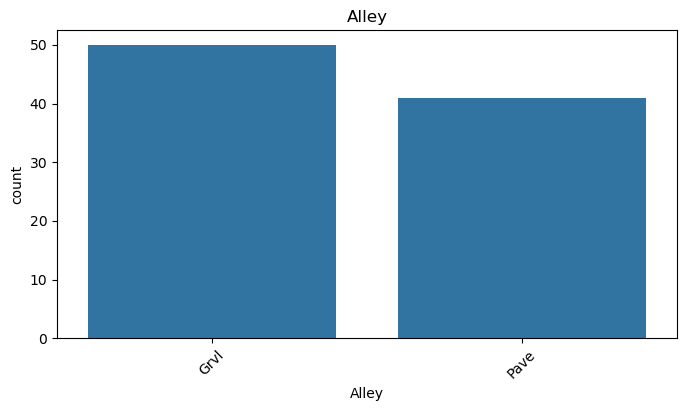

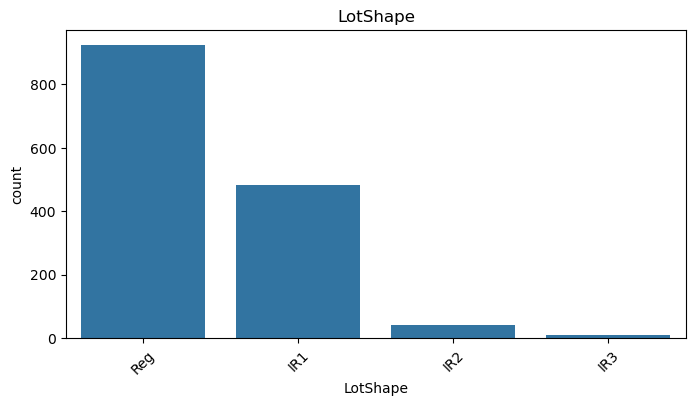

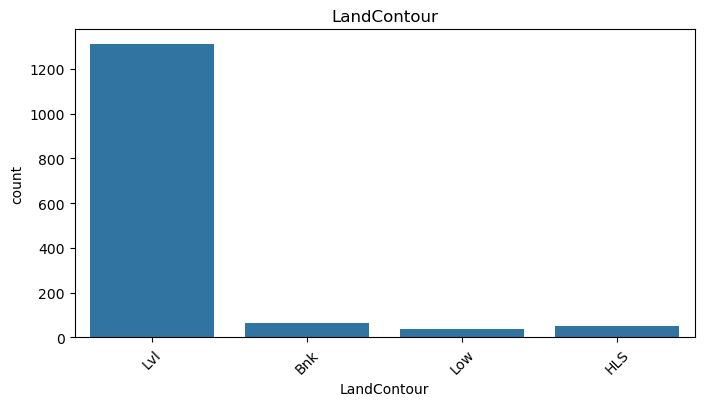

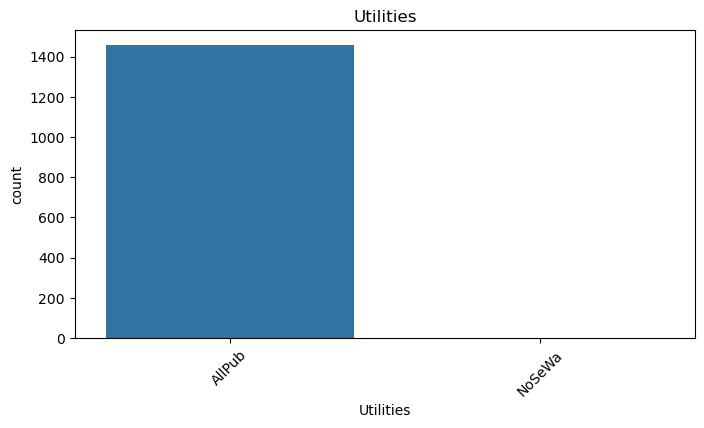

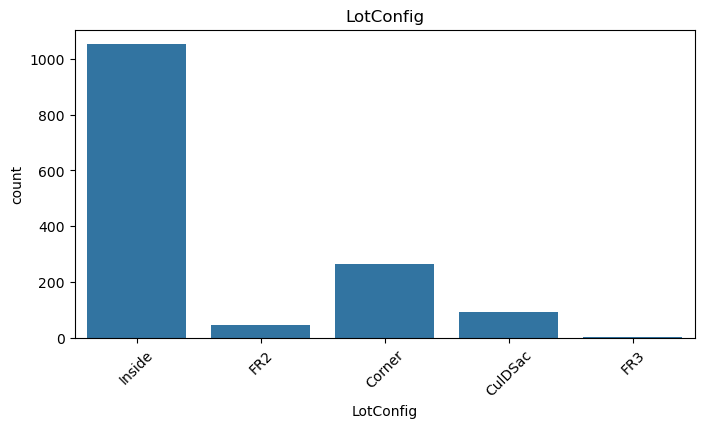

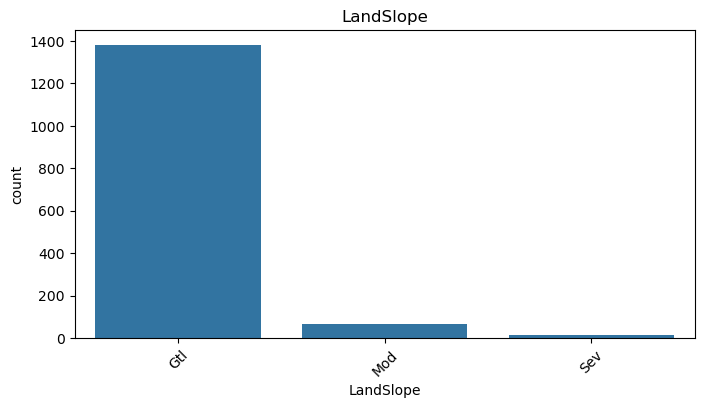

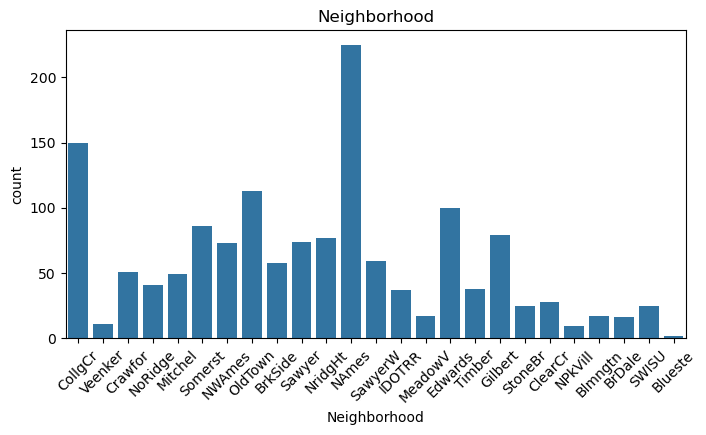

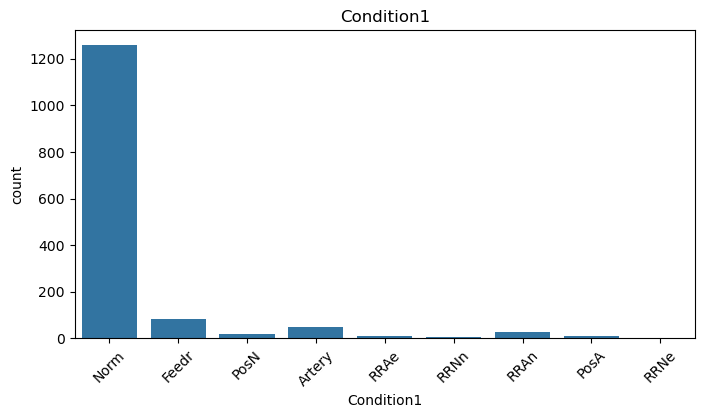

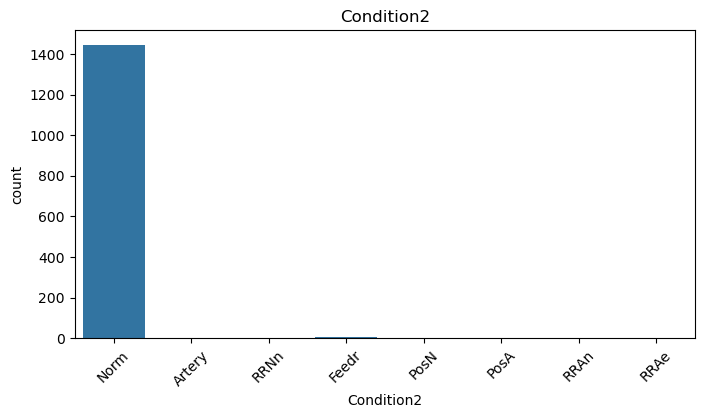

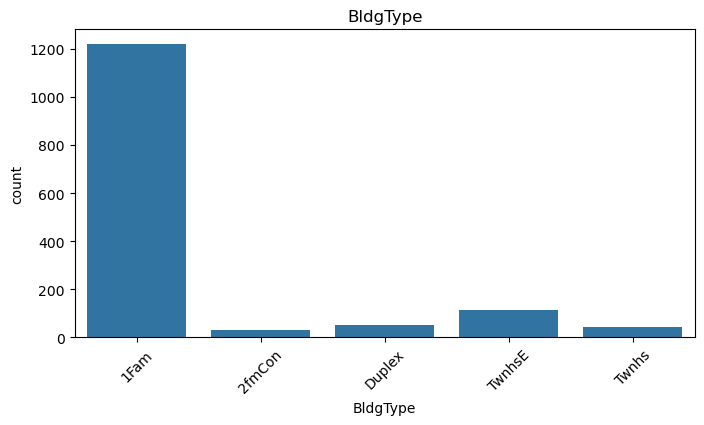

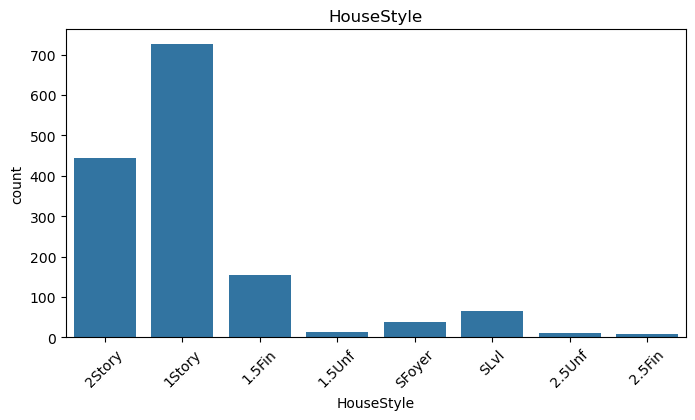

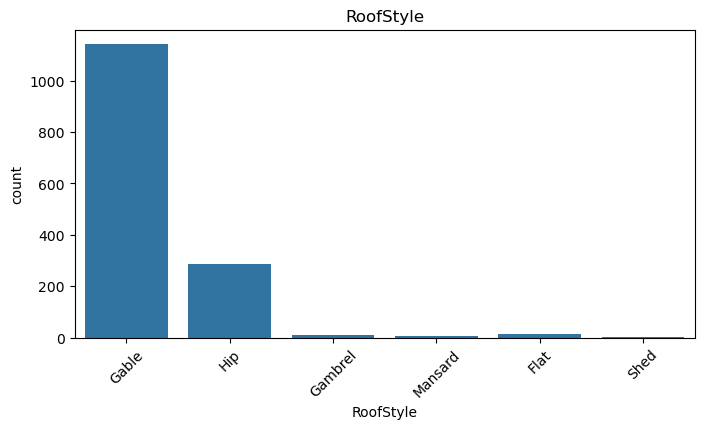

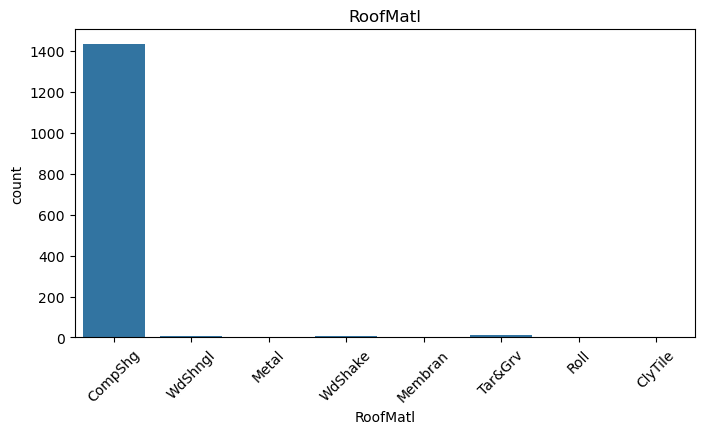

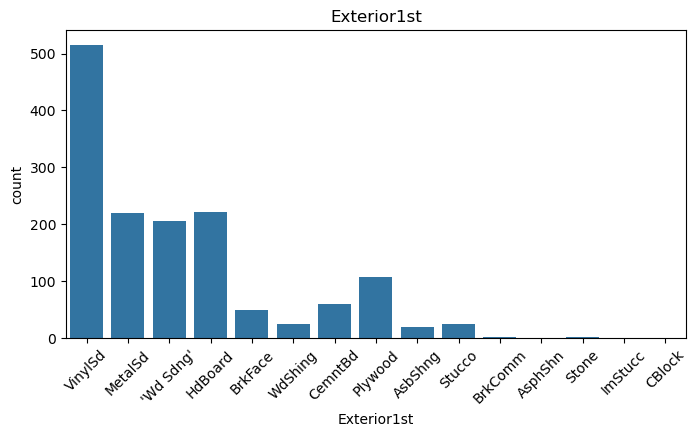

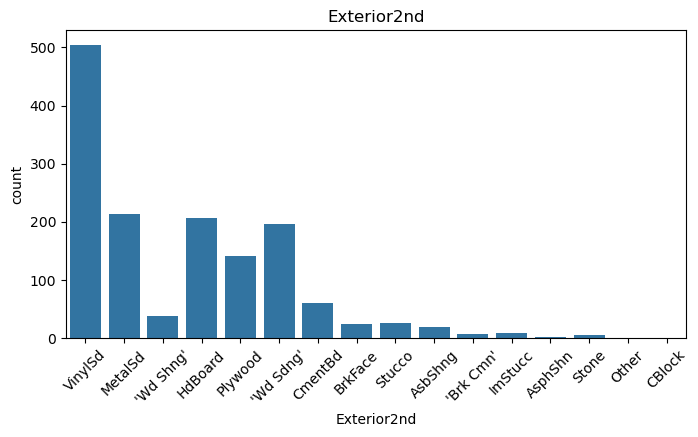

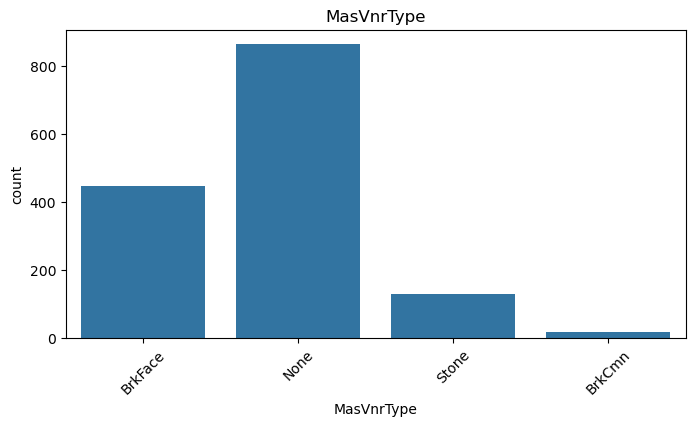

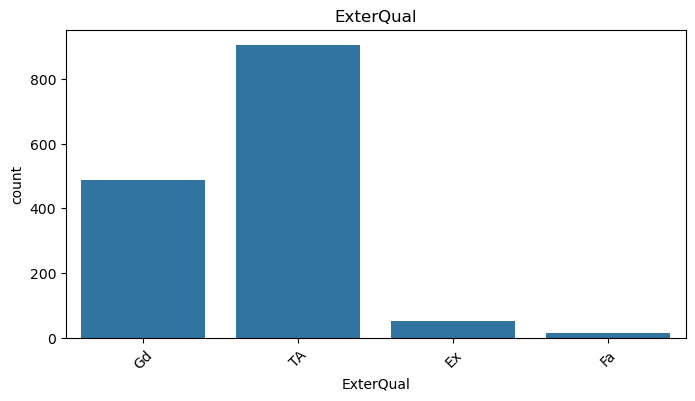

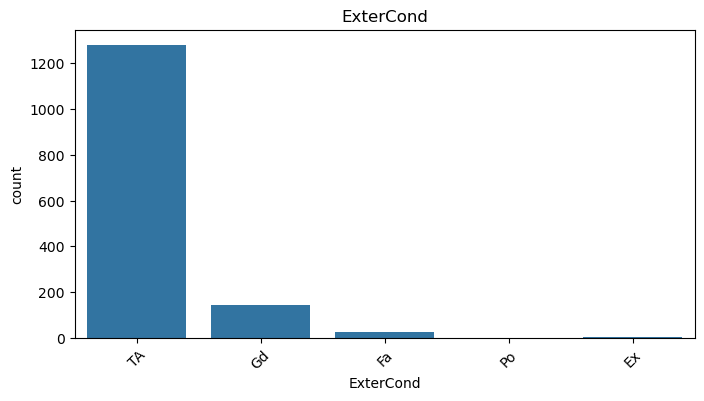

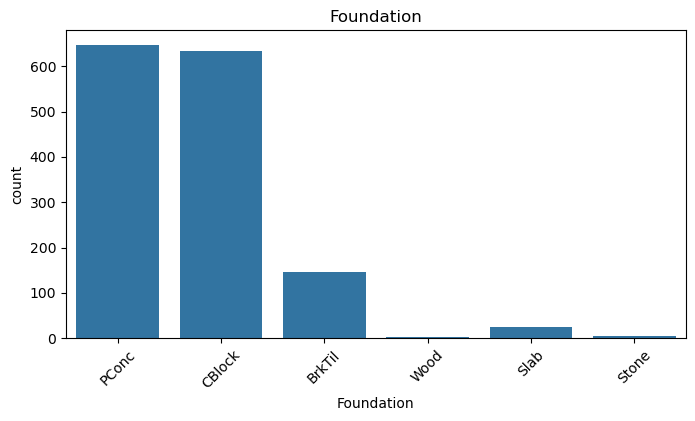

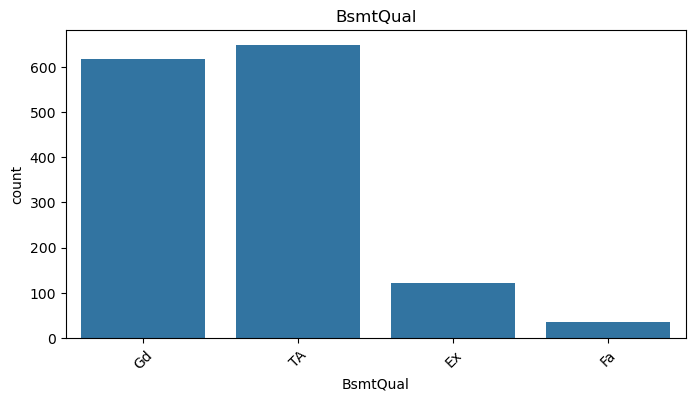

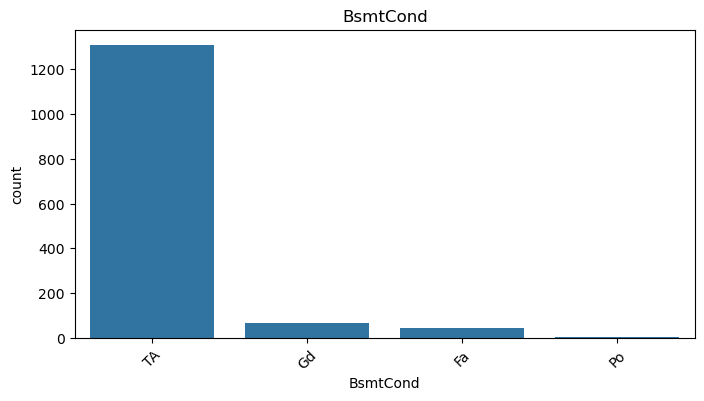

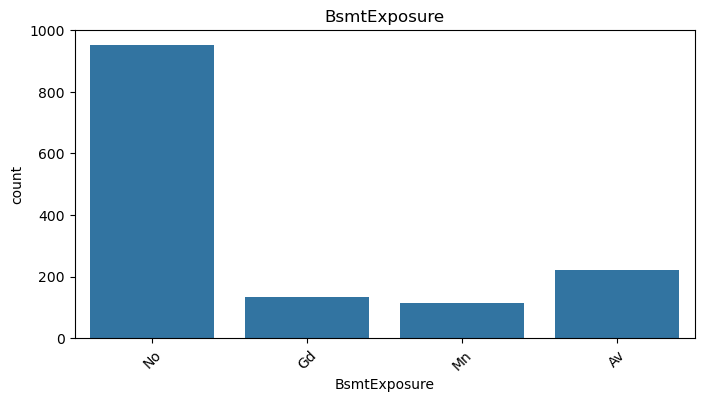

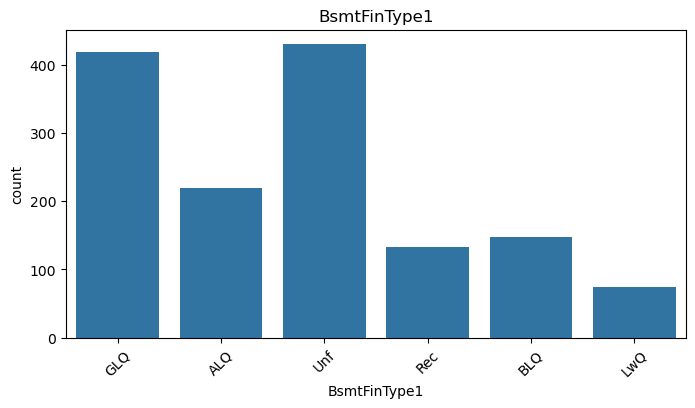

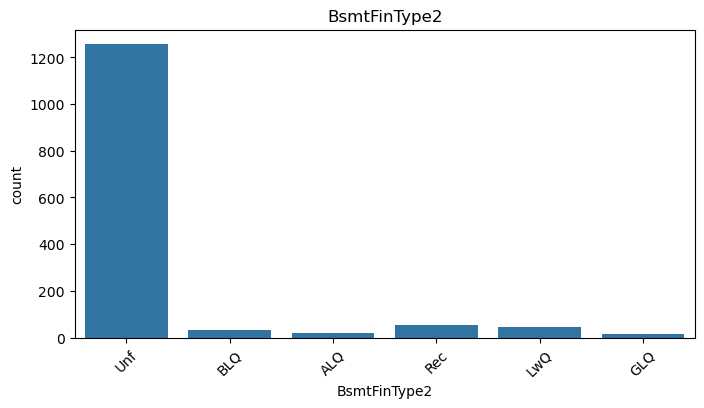

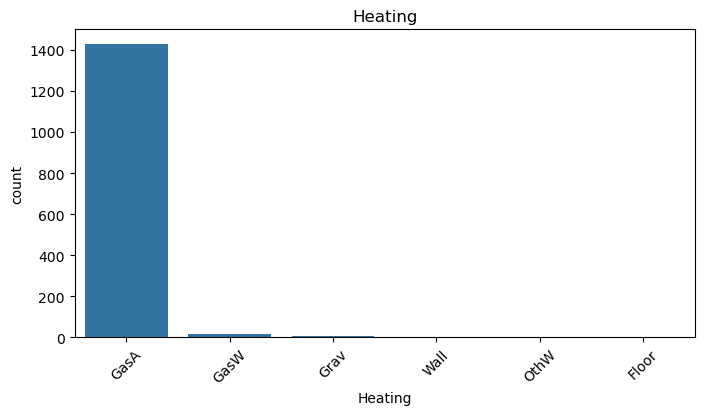

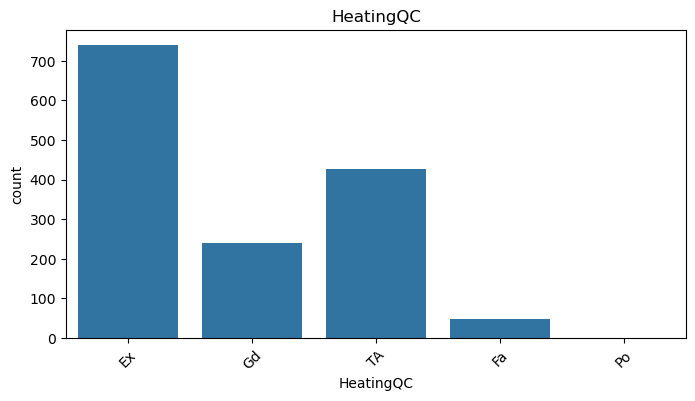

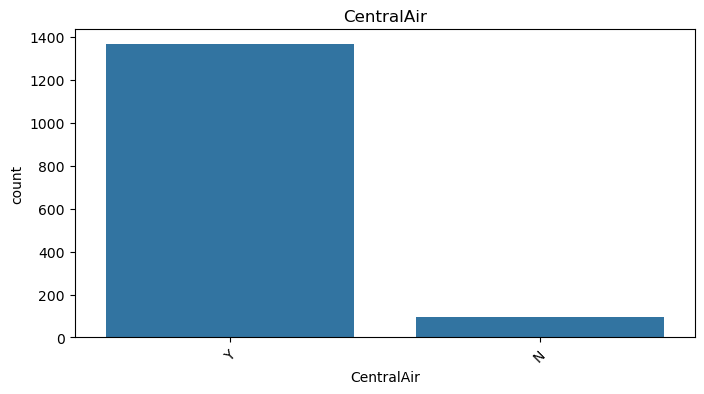

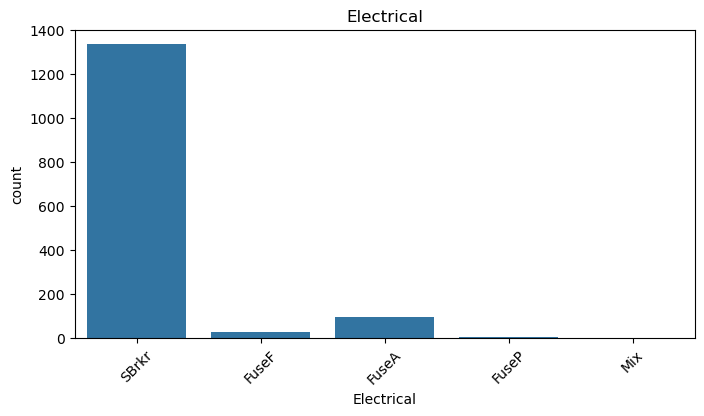

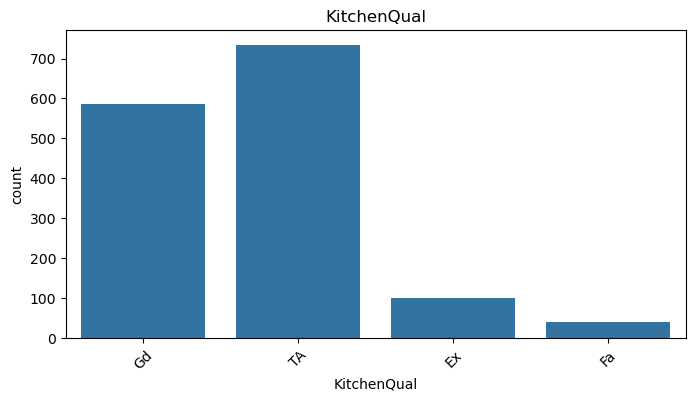

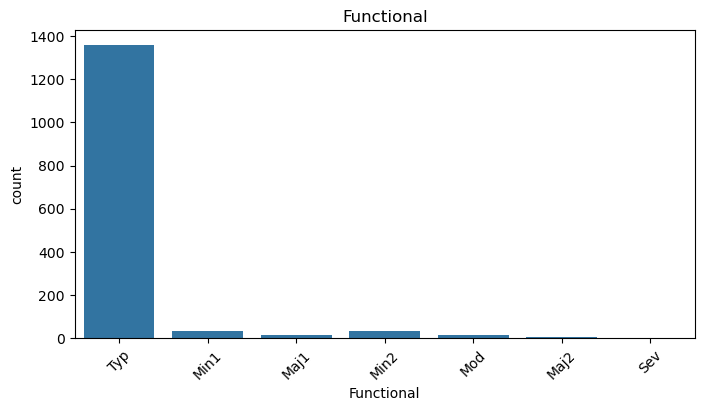

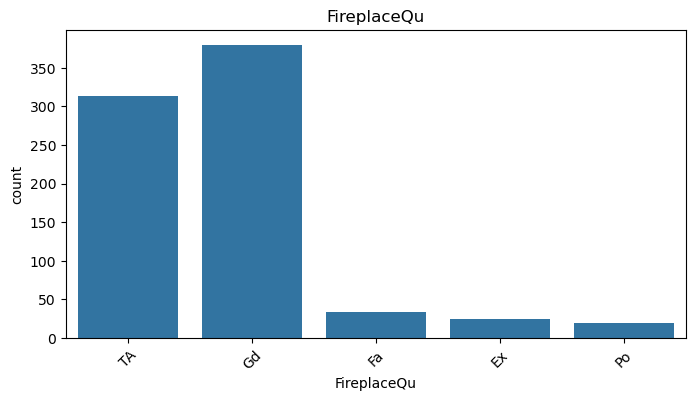

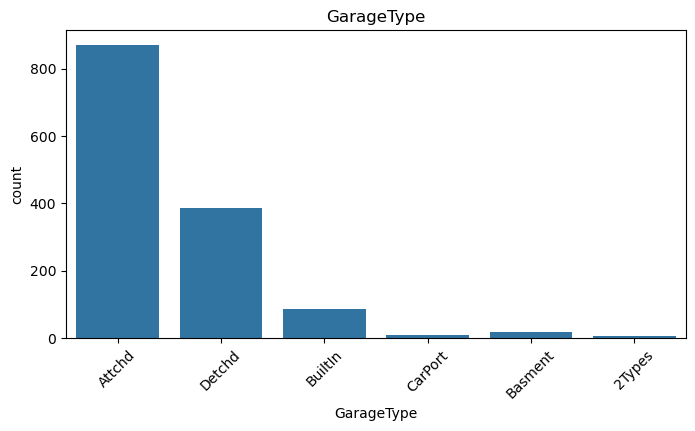

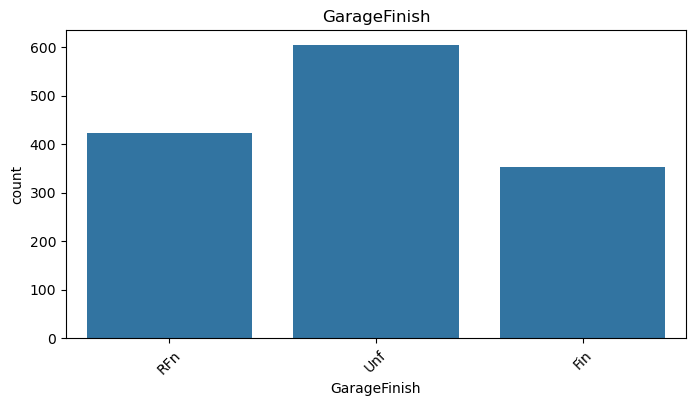

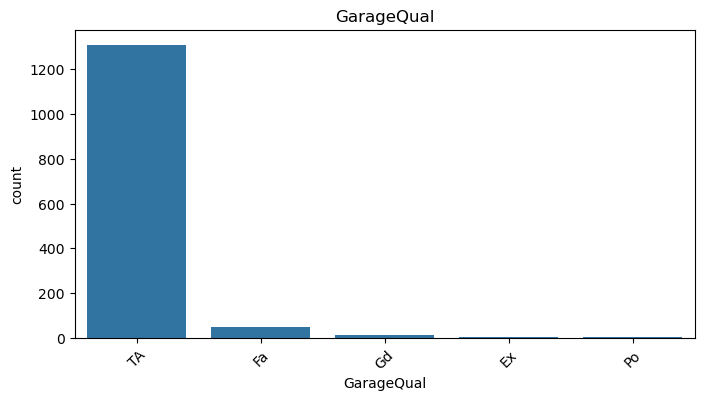

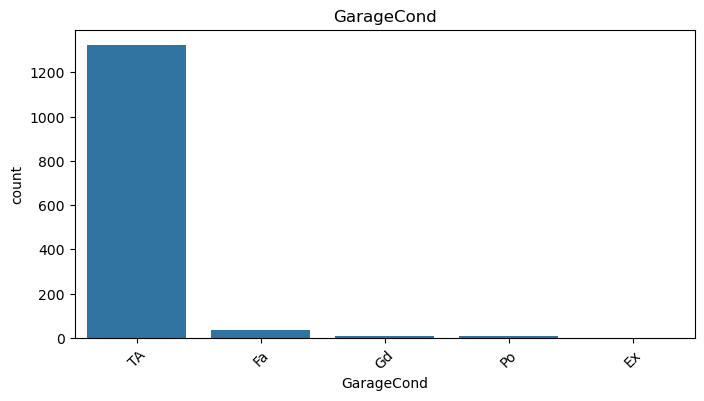

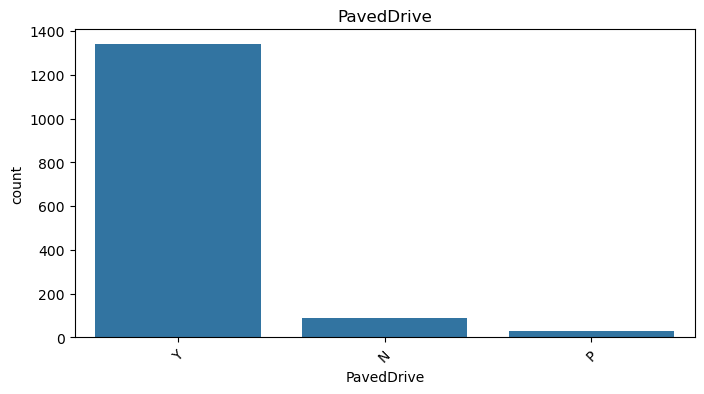

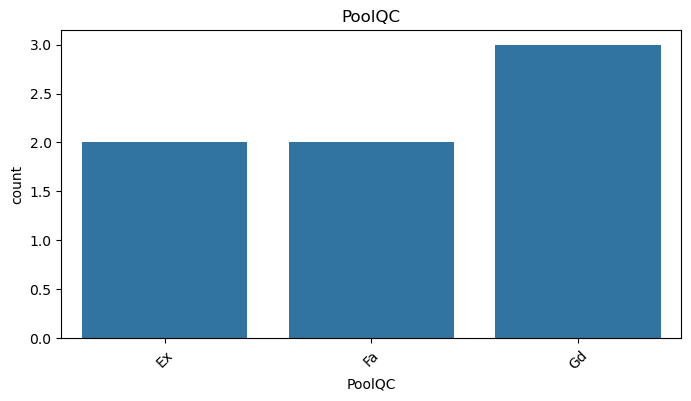

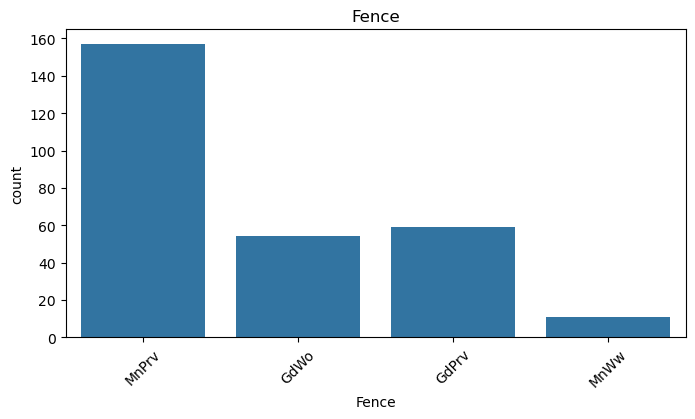

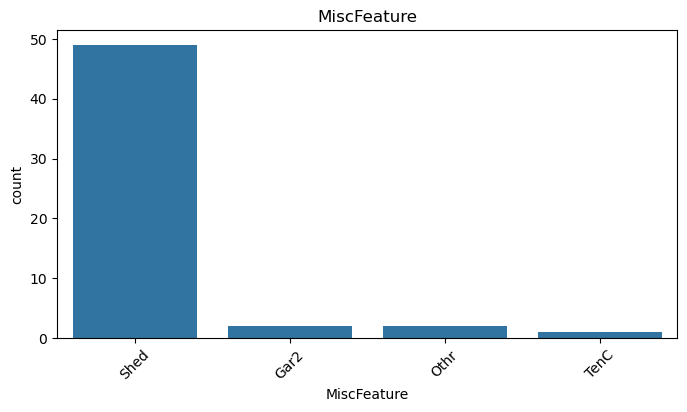

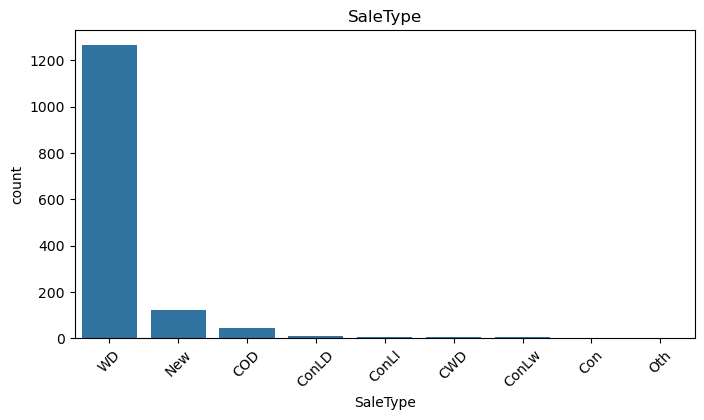

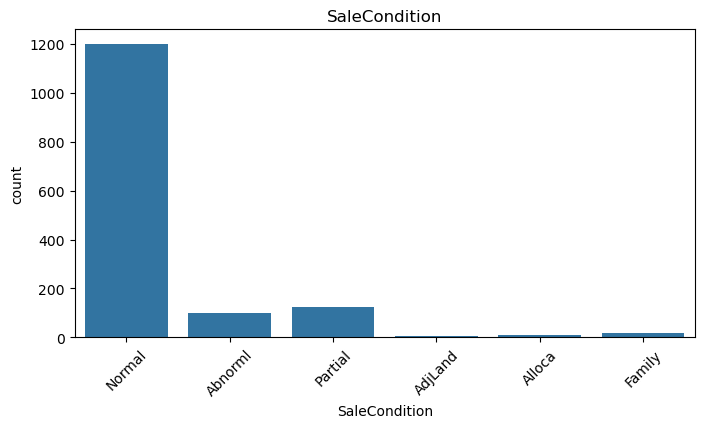

In [12]:
import seaborn as sns
cat_features = df.select_dtypes(include=['object']).columns

for col in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


## 🧹 **3. Data Cleaning and Handling Missing Values**

> Raw housing data often contains **missing values, outliers, and inconsistent entries** that can bias models.  
> This step ensures a clean, consistent dataset.

**Steps performed:**
- Features with **too many missing values** (or little predictive importance) are **dropped**.
- For **categorical features**, missing values are replaced with calculated mode values.
- For **numerical features**, missing entries are filled with **median values** to maintain robustness against outliers.
- Outliers in numeric columns (e.g., `GrLivArea`, `LotFrontage`) are visualized and capped if necessary.

> These steps ensure the model learns from representative and complete data.

---

In [13]:
df["PoolArea"].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [14]:
df["MiscVal"].value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
350         1
15500       1
800         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [15]:
df["ScreenPorch"].value_counts()

ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
155       1
220       1
119       1
40        1
410       1
Name: count, Length: 76, dtype: int64

In [16]:
for col in cat_features:
    top_ratio = df[col].value_counts(normalize=True).iloc[0]  # fraction of most common category
    print(f"{col}: {top_ratio:.3f}")


MSZoning: 0.788
Street: 0.996
Alley: 0.549
LotShape: 0.634
LandContour: 0.898
Utilities: 0.999
LotConfig: 0.721
LandSlope: 0.947
Neighborhood: 0.154
Condition1: 0.863
Condition2: 0.990
BldgType: 0.836
HouseStyle: 0.497
RoofStyle: 0.782
RoofMatl: 0.982
Exterior1st: 0.353
Exterior2nd: 0.345
MasVnrType: 0.595
ExterQual: 0.621
ExterCond: 0.878
Foundation: 0.443
BsmtQual: 0.456
BsmtCond: 0.921
BsmtExposure: 0.670
BsmtFinType1: 0.302
BsmtFinType2: 0.883
Heating: 0.978
HeatingQC: 0.508
CentralAir: 0.935
Electrical: 0.914
KitchenQual: 0.503
Functional: 0.932
FireplaceQu: 0.494
GarageType: 0.631
GarageFinish: 0.439
GarageQual: 0.951
GarageCond: 0.962
PavedDrive: 0.918
PoolQC: 0.429
Fence: 0.559
MiscFeature: 0.907
SaleType: 0.868
SaleCondition: 0.821


In [17]:
dominant_features = [col for col in cat_features if df[col].value_counts(normalize=True).iloc[0] > 0.98]
print("Dominant categorical features:", dominant_features)


Dominant categorical features: ['Street', 'Utilities', 'Condition2', 'RoofMatl']


In [18]:
# Dropping the Categorical Features with more than 98% of same value

df = df.drop('Street', axis=1)
df = df.drop('Utilities', axis=1)
df = df.drop('Condition2', axis=1)
df = df.drop('RoofMatl', axis=1)

In [19]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450   NaN      Reg         Lvl   
1          20       RL         80.0     9600   NaN      Reg         Lvl   
2          60       RL         68.0    11250   NaN      IR1         Lvl   
3          70       RL         60.0     9550   NaN      IR1         Lvl   
4          60       RL         84.0    14260   NaN      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PoolArea PoolQC Fence  MiscFeature  \
0    Inside       Gtl      CollgCr  ...        0    NaN   NaN          NaN   
1       FR2       Gtl      Veenker  ...        0    NaN   NaN          NaN   
2    Inside       Gtl      CollgCr  ...        0    NaN   NaN          NaN   
3    Corner       Gtl      Crawfor  ...        0    NaN   NaN          NaN   
4       FR2       Gtl      NoRidge  ...        0    NaN   NaN          NaN   

   MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
0        0       2    2008       WD        Normal    208500  
1        0       5    2007       WD        Normal    181500  
2        0       9    2008       WD        Normal    223500  
3        0       2    2006       WD       Abnorml    140000  
4        0      12    2008       WD        Normal    250000  

[5 rows x 76 columns]

In [20]:
num_features=df.select_dtypes(include=['int64','float64']).columns
dominant_features = [num for num in num_features if df[num].value_counts(normalize=True).iloc[0] > 0.98]
print("Dominant categorical features:", dominant_features)

Dominant categorical features: ['LowQualFinSF', '3SsnPorch', 'PoolArea']


In [21]:
# Doing the same for numerical features
df=df.drop('LowQualFinSF',axis=1)
df=df.drop('3SsnPorch',axis=1)
df=df.drop('PoolArea',axis=1)

In [22]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450   NaN      Reg         Lvl   
1          20       RL         80.0     9600   NaN      Reg         Lvl   
2          60       RL         68.0    11250   NaN      IR1         Lvl   
3          70       RL         60.0     9550   NaN      IR1         Lvl   
4          60       RL         84.0    14260   NaN      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... ScreenPorch PoolQC Fence  MiscFeature  \
0    Inside       Gtl      CollgCr  ...           0    NaN   NaN          NaN   
1       FR2       Gtl      Veenker  ...           0    NaN   NaN          NaN   
2    Inside       Gtl      CollgCr  ...           0    NaN   NaN          NaN   
3    Corner       Gtl      Crawfor  ...           0    NaN   NaN          NaN   
4       FR2       Gtl      NoRidge  ...           0    NaN   NaN          NaN   

   MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
0        0       2    2008       WD        Normal    208500  
1        0       5    2007       WD        Normal    181500  
2        0       9    2008       WD        Normal    223500  
3        0       2    2006       WD       Abnorml    140000  
4        0      12    2008       WD        Normal    250000  

[5 rows x 73 columns]

In [23]:
cat_features=df.select_dtypes(include=['object']).columns
num_features=df.select_dtypes(include=['int64','float64']).columns

In [24]:
df[num_features] = df[num_features].fillna(df[num_features].median())

In [25]:
df[['Alley','PoolQC','Fence','FireplaceQu','MiscFeature']] = df[['Alley','PoolQC','Fence','FireplaceQu','MiscFeature']].fillna('None')


In [26]:
import pandas as pd
pd.set_option('display.max_rows', None)
df[cat_features].isnull().sum().sort_values(ascending=True)

MSZoning          0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
FireplaceQu       0
HeatingQC         0
Heating           0
CentralAir        0
KitchenQual       0
Functional        0
PoolQC            0
PavedDrive        0
MiscFeature       0
Fence             0
SaleType          0
SaleCondition     0
Electrical        1
MasVnrType        8
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
BsmtExposure     38
BsmtFinType2     38
GarageType       81
GarageQual       81
GarageFinish     81
GarageCond       81
dtype: int64

In [27]:
df[['Electrical','MasVnrType', 'BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageCond','GarageQual','GarageFinish','GarageType']] = df[['Electrical','MasVnrType', 'BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure','GarageCond','GarageQual','GarageFinish','GarageType']].apply(lambda x: x.fillna(x.mode()[0]))


In [28]:
df.isnull().sum().sort_values(ascending=True)

PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType  

In [29]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0          60       RL         65.0     8450  None      Reg         Lvl   
1          20       RL         80.0     9600  None      Reg         Lvl   
2          60       RL         68.0    11250  None      IR1         Lvl   
3          70       RL         60.0     9550  None      IR1         Lvl   
4          60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... ScreenPorch PoolQC Fence  MiscFeature  \
0    Inside       Gtl      CollgCr  ...           0   None  None         None   
1       FR2       Gtl      Veenker  ...           0   None  None         None   
2    Inside       Gtl      CollgCr  ...           0   None  None         None   
3    Corner       Gtl      Crawfor  ...           0   None  None         None   
4       FR2       Gtl      NoRidge  ...           0   None  None         None   

   MiscVal  MoSold  YrSold SaleType SaleCondition SalePrice  
0        0       2    2008       WD        Normal    208500  
1        0       5    2007       WD        Normal    181500  
2        0       9    2008       WD        Normal    223500  
3        0       2    2006       WD       Abnorml    140000  
4        0      12    2008       WD        Normal    250000  

[5 rows x 73 columns]

In [30]:
df['MSSubClass'].value_counts(ascending=False)

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [31]:
df['MSSubClass'] = df['MSSubClass'].astype(str)


## ⚙️ **4. Identifying and Correcting Skewness in Numeric Features**

> In this section, we focus on **detecting and correcting skewness** in our numerical features — one of the most crucial preprocessing steps before fitting any regression model.  
>  
> Many real-world datasets, especially housing price data, contain **heavily right-skewed variables** (for example, `LotArea`, `TotalBsmtSF`, or `SalePrice`).  
> These distributions can distort model training because most regression algorithms assume the input data is approximately **normally distributed**.  
>  
> Highly skewed data often leads to:
> - Overemphasis on large values or outliers  
> - Poor linear fit  
> - Biased parameter estimation  
> - Inefficient gradient optimization  


### 🧭 **4.1. Measuring Skewness**
We begin by calculating the **skewness** of all numerical features using the `.skew()` function.  
This statistic measures how asymmetric a feature’s distribution is relative to a normal curve:
- **0** → Perfectly symmetric  
- **> 0.75** → Moderately right-skewed  
- **> 1.0** → Highly right-skewed  

By sorting skewness values in descending order, we identify which columns deviate most from normality and therefore require transformation.  
For instance, variables like `MiscVal`, `LotArea`, `BsmtFinSF2`, and `ScreenPorch` show extreme skew (>4), indicating the presence of outliers or wide-ranging values.

---

In [32]:
skewed_feats = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed_feats)


MiscVal          24.476794
LotArea          12.207688
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.409147
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.678333
dtype: float64


### 📊 **4.2. Visualizing Distributions**
We then visualize each numerical feature using **Seaborn histograms** (`sns.histplot`) with **KDE curves** to understand their density and shape.  
This visual step helps confirm the skewness detected numerically and provides intuition about which transformations might be appropriate.  
You can easily see long right tails in features like `LotArea`, `TotalBsmtSF`, and `GrLivArea`.

---

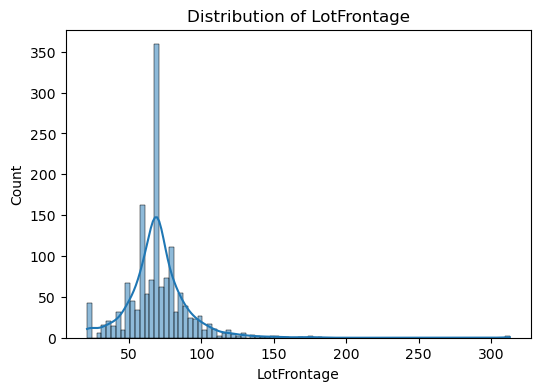

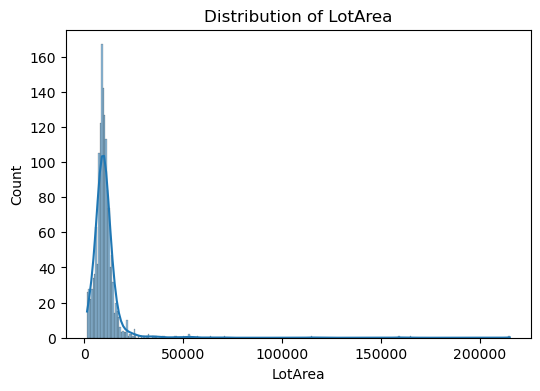

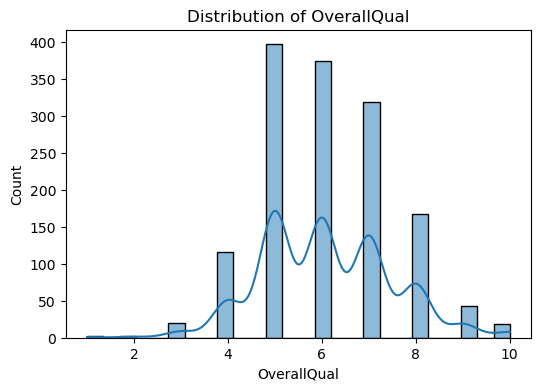

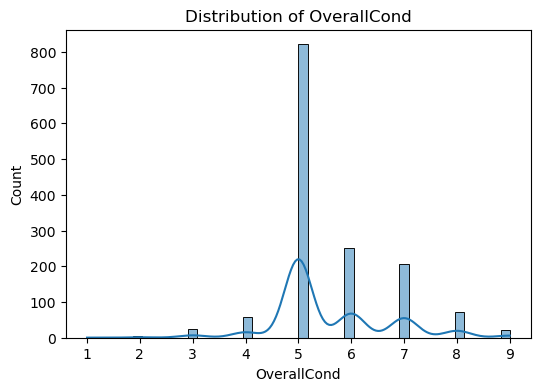

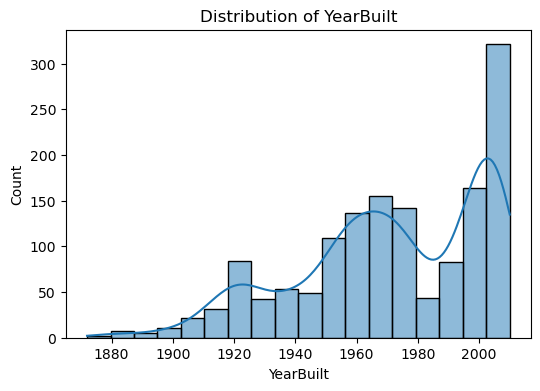

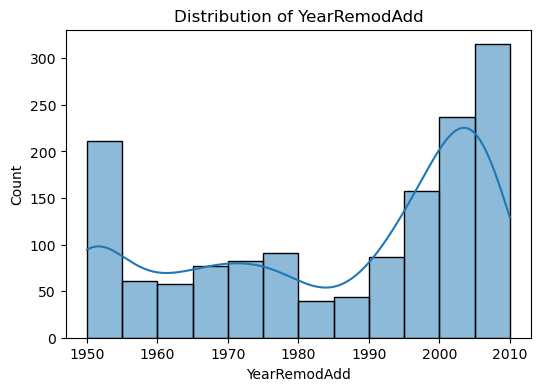

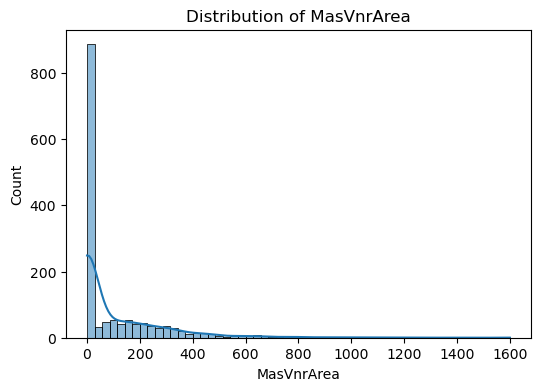

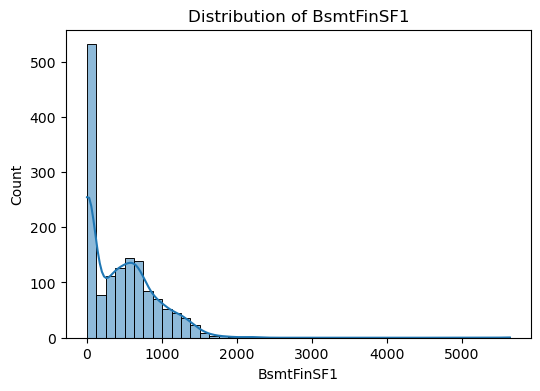

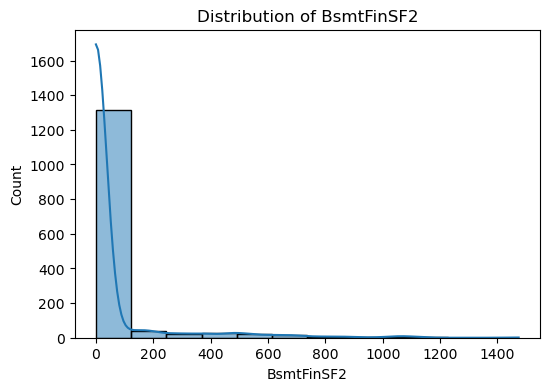

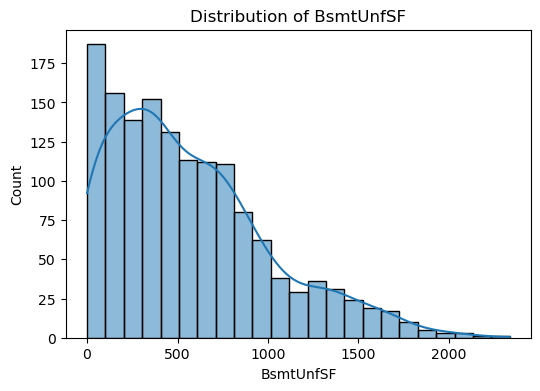

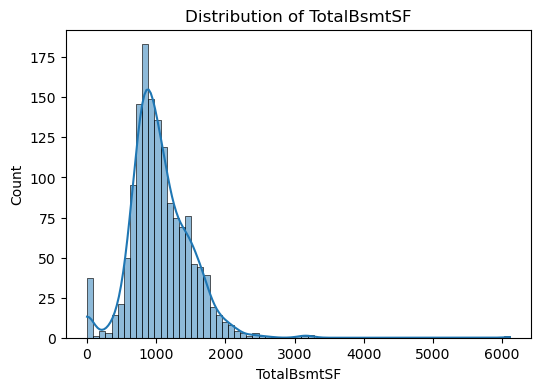

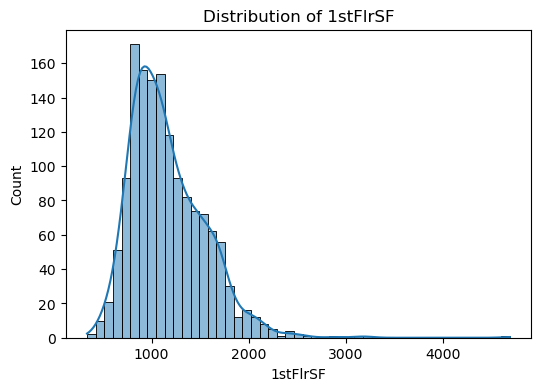

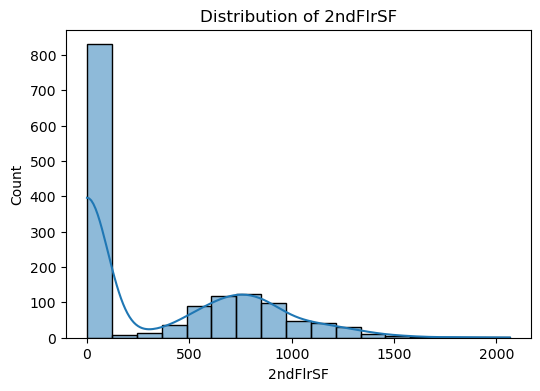

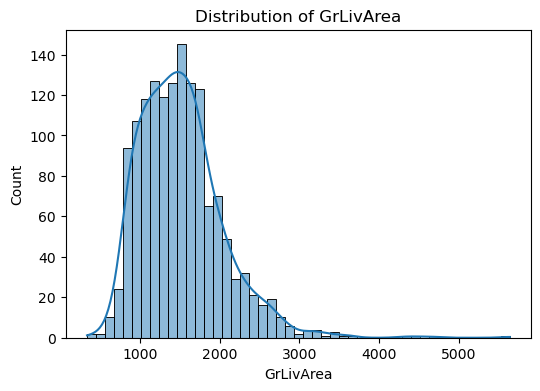

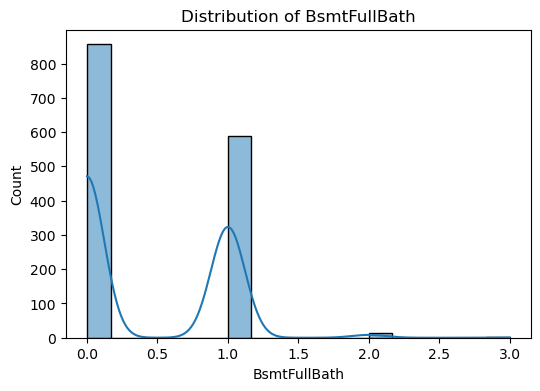

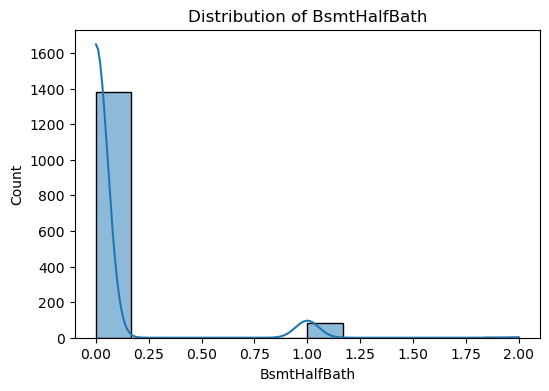

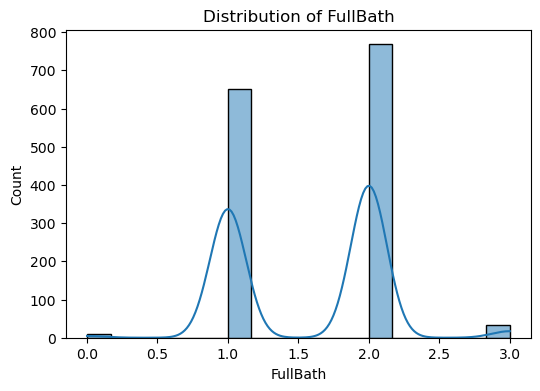

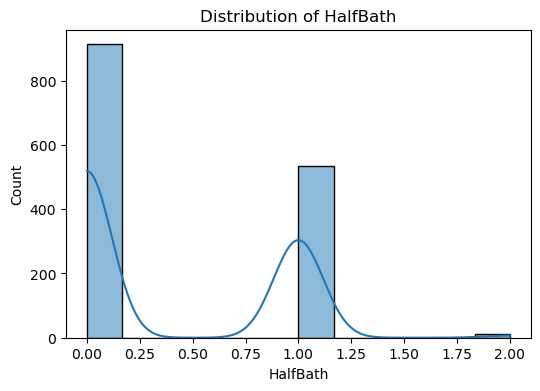

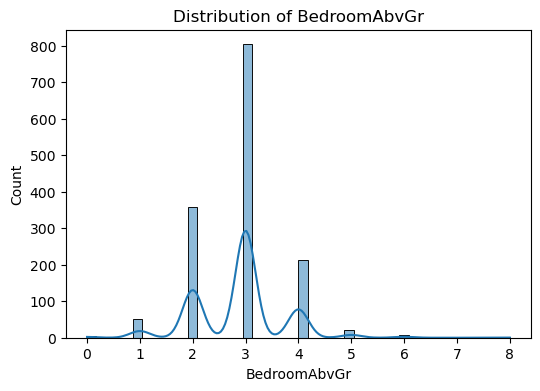

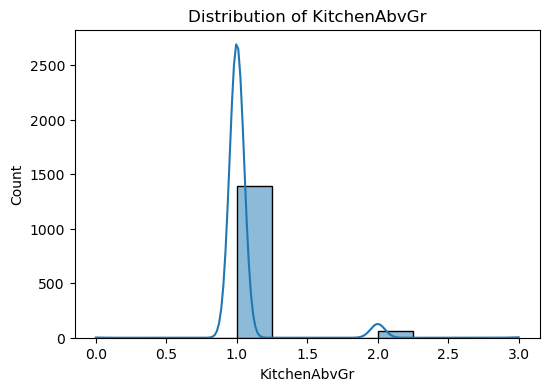

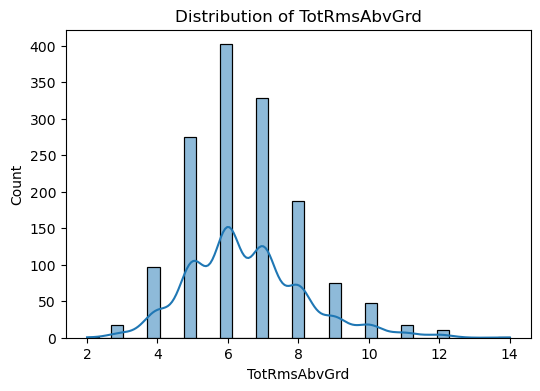

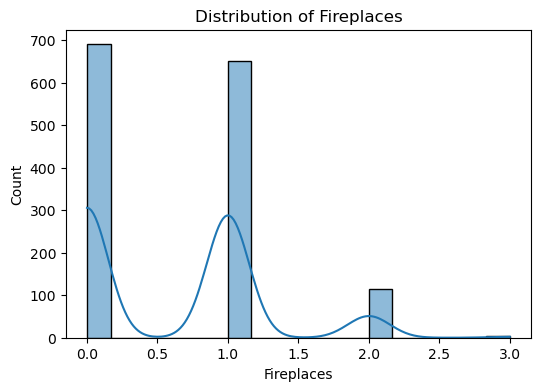

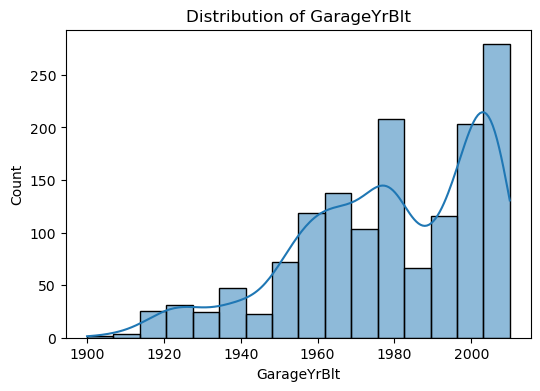

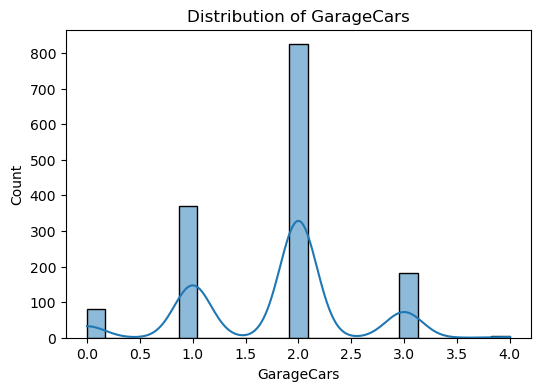

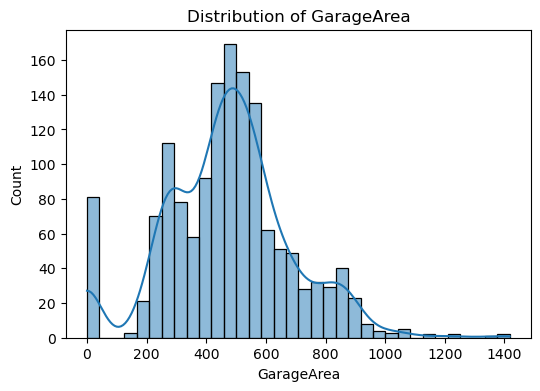

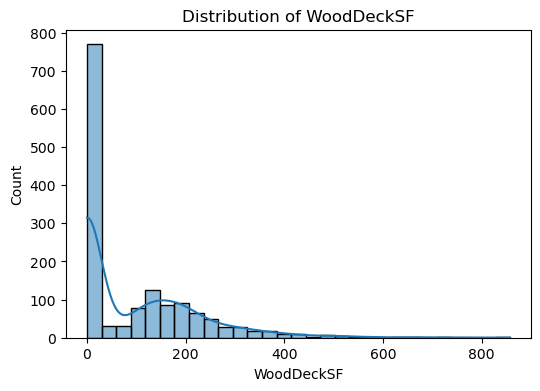

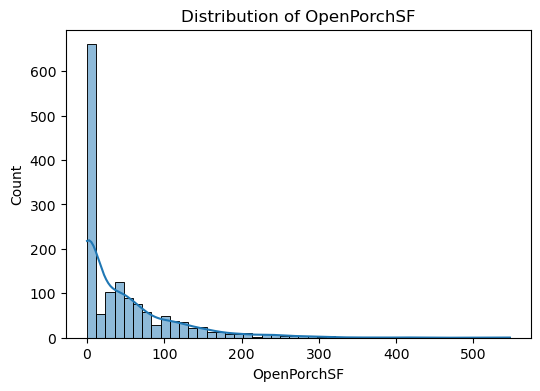

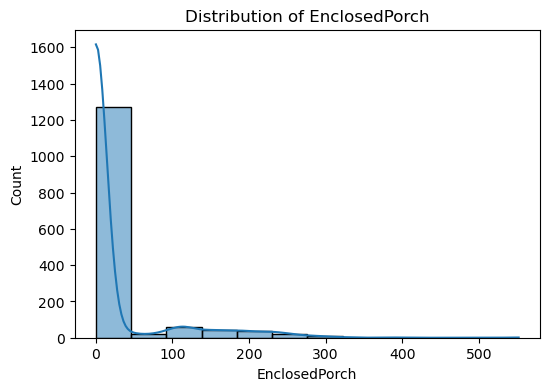

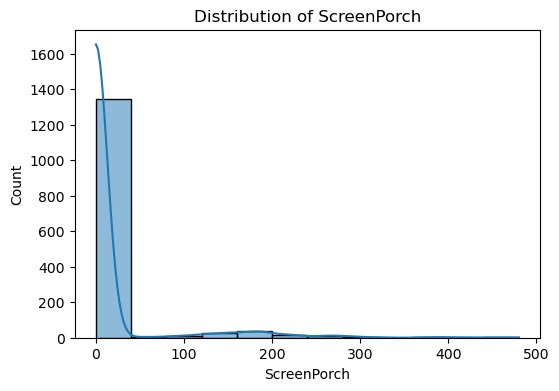

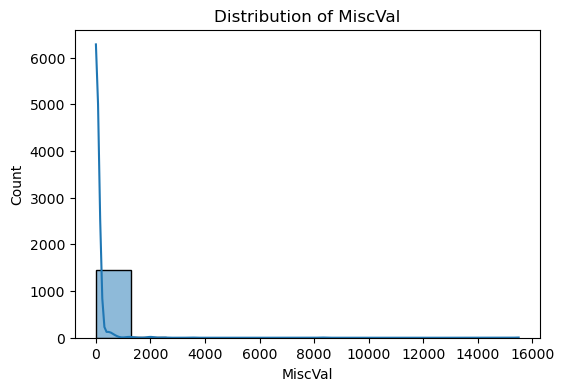

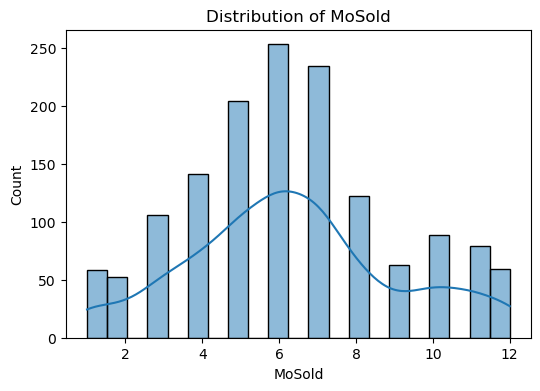

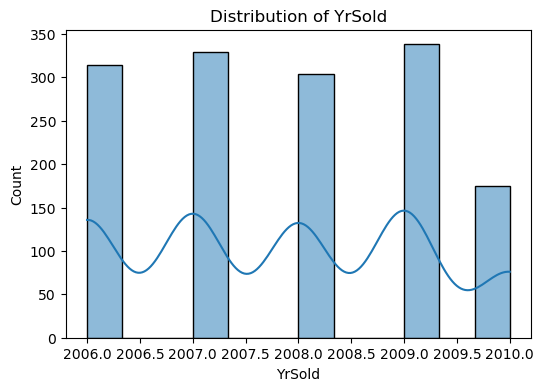

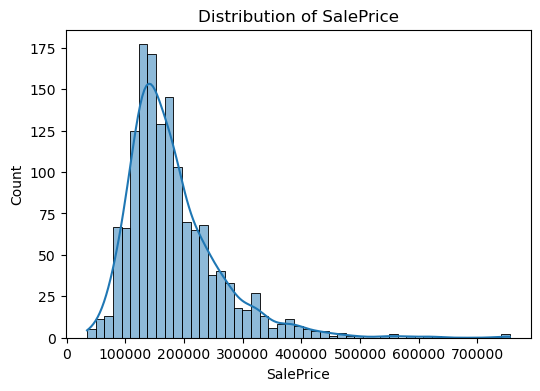

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 🔁 **4.3. Applying Logarithmic Transformation**
To correct the skew and compress extreme values, we apply a **logarithmic transformation** (`np.log1p`) to highly skewed variables.  
This transformation:
- Reduces the influence of extreme values  
- Stabilizes variance across features  
- Makes linear relationships more prominent  
- Improves model interpretability  

The `np.log1p()` function is used instead of `np.log()` because it safely handles zero values (computing `log(1 + x)`).

A set of features such as `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `TotalBsmtSF`, and even the target variable `SalePrice` are transformed.  
Each transformation is followed by a visualization to confirm that the resulting distribution is now **more symmetrical and bell-shaped**.

**Why Log-Transform the Target Variable (`SalePrice`)**
The target variable `SalePrice` was also **right-skewed (skewness ≈ 1.88)**, meaning that most homes are moderately priced while a few luxury houses are priced far higher.  
If left uncorrected, this skew would cause:
- The model to overfit high-value homes  
- Loss functions (like RMSE) to be dominated by large residuals  

By applying a log transformation:
- The target distribution becomes approximately normal  
- Residuals are more homoscedastic (constant variance)  
- The model learns percentage-based differences rather than absolute price gaps  

Thus, when the model predicts in log scale, we can **exponentiate** the predictions (`np.expm1`) back to actual prices.

---

In [34]:
import numpy as np

# Features to log-transform
to_log = ['LotArea', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 
           'MasVnrArea', 'LotFrontage', 'OpenPorchSF', 'SalePrice',
           'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

for col in to_log:
    df[col] = np.log1p(df[col])


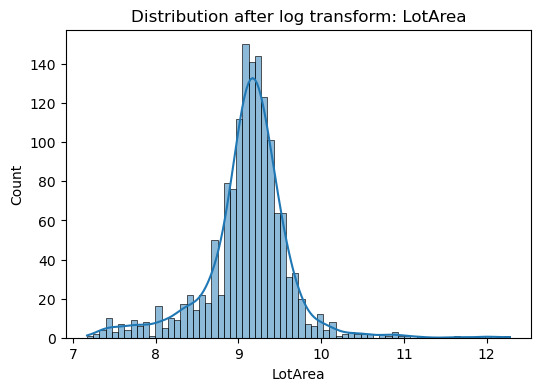

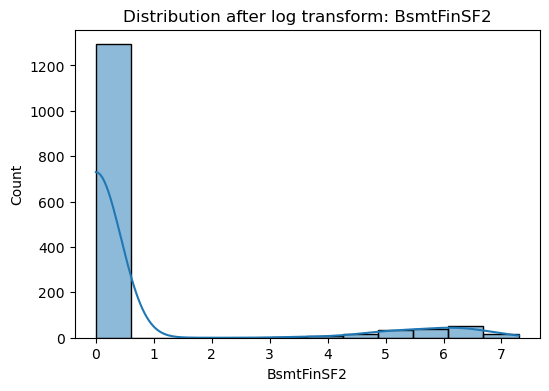

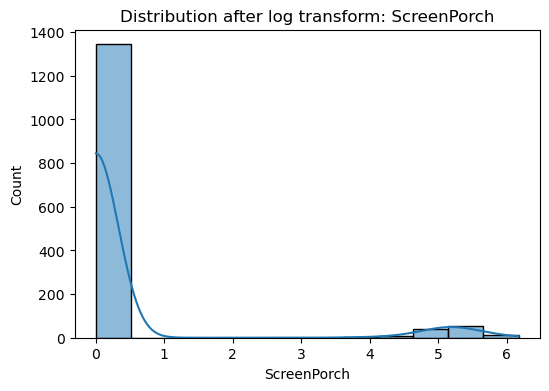

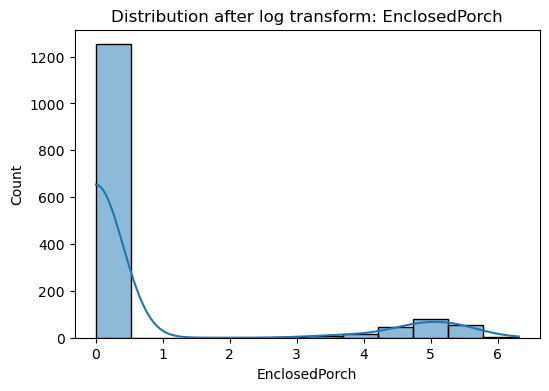

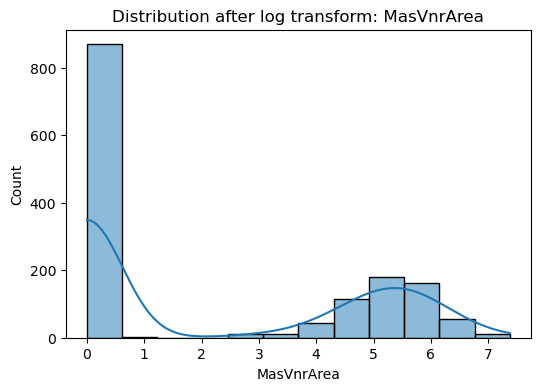

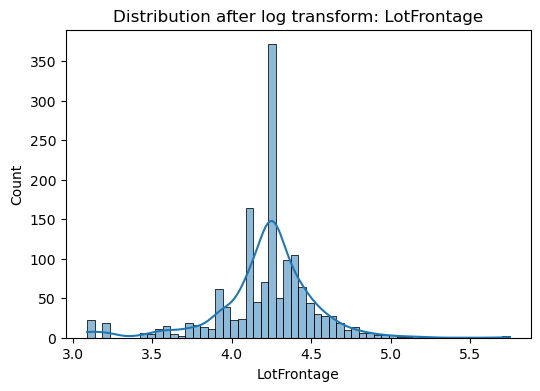

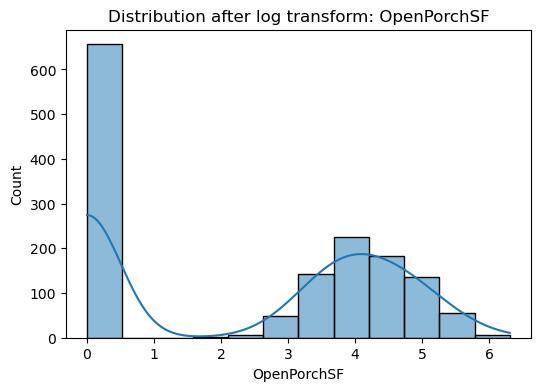

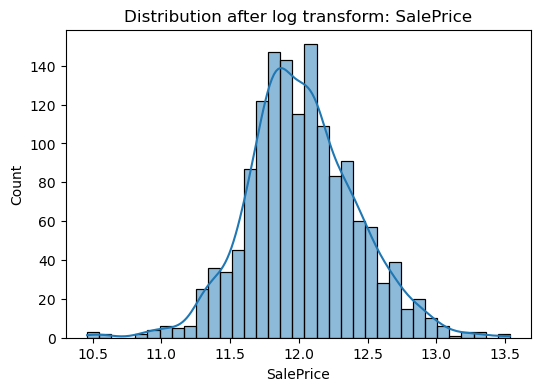

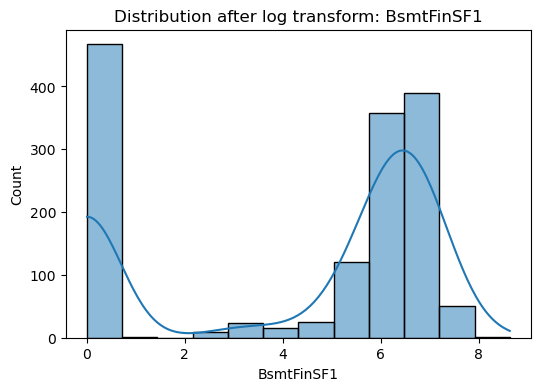

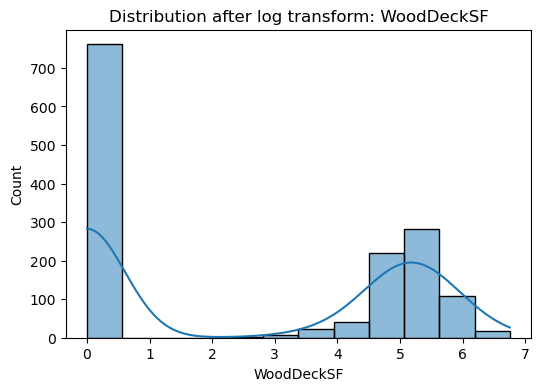

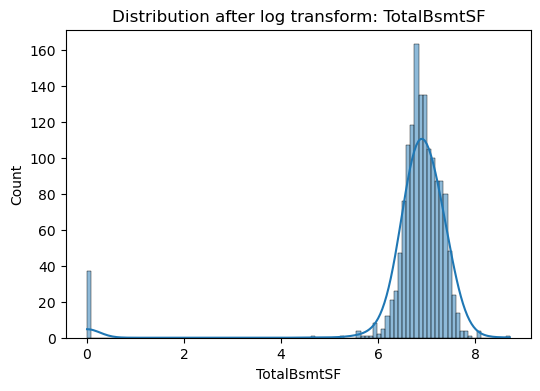

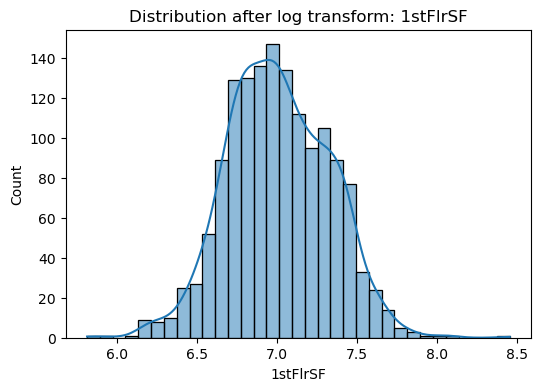

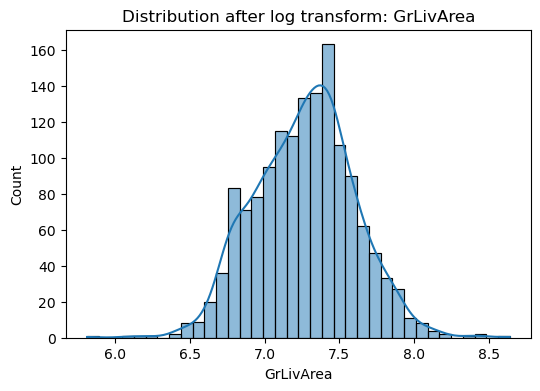

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in to_log:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution after log transform: {col}")
    plt.show()


In [36]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea Alley LotShape LandContour  \
0         60       RL     4.189655  9.042040  None      Reg         Lvl   
1         20       RL     4.394449  9.169623  None      Reg         Lvl   
2         60       RL     4.234107  9.328212  None      IR1         Lvl   
3         70       RL     4.110874  9.164401  None      IR1         Lvl   
4         60       RL     4.442651  9.565284  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... ScreenPorch PoolQC Fence  MiscFeature  \
0    Inside       Gtl      CollgCr  ...         0.0   None  None         None   
1       FR2       Gtl      Veenker  ...         0.0   None  None         None   
2    Inside       Gtl      CollgCr  ...         0.0   None  None         None   
3    Corner       Gtl      Crawfor  ...         0.0   None  None         None   
4       FR2       Gtl      NoRidge  ...         0.0   None  None         None   

   MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        0       2    2008       WD        Normal  12.247699  
1        0       5    2007       WD        Normal  12.109016  
2        0       9    2008       WD        Normal  12.317171  
3        0       2    2006       WD       Abnorml  11.849405  
4        0      12    2008       WD        Normal  12.429220  

[5 rows x 73 columns]

## **5. Correlation Analysis**

> A **correlation matrix** and **heatmap** visualize relationships among numerical variables.  
> The following features exhibit the strongest positive correlation with `SalePrice`:
> - `OverallQual` (overall material and finish quality)
> - `GrLivArea` (above-ground living area)
> - `GarageCars` (garage capacity)
> - `TotalBsmtSF` (basement area)
> - `YearBuilt` (newer homes tend to cost more)

> Negatively correlated features include `YrSold` and age-related variables.  
>  
> This correlation insight guides which variables to engineer and prioritize during model building.


<Axes: >

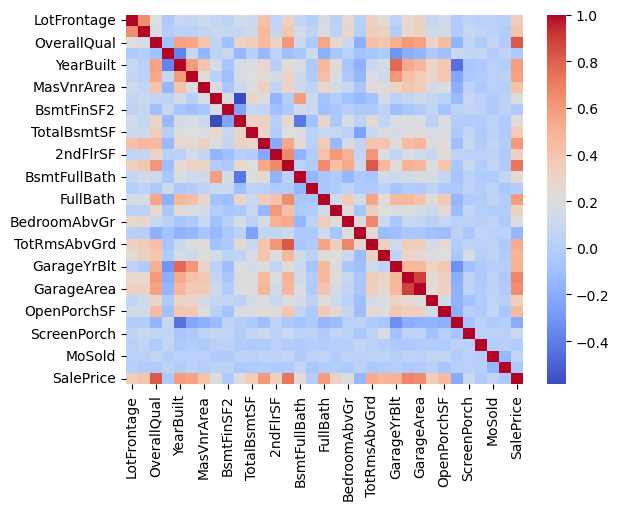

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)


In [38]:
num_features=df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix=df[num_features].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.495794
Fireplaces       0.489450
OpenPorchSF      0.459948
MasVnrArea       0.413318
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.346237
WoodDeckSF       0.343039
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
ScreenPorch      0.105857
MoSold           0.057330
BsmtHalfBath    -0.005149
MiscVal         -0.020021
BsmtFinSF2      -0.030361
OverallCond     -0.036868
YrSold          -0.037263
KitchenAbvGr    -0.147548
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

## 🧱 **6. Feature Engineering**

> Feature engineering enhances model performance by introducing new variables that capture underlying patterns not visible in the raw data.

### **Key Engineered Features**
| Feature | Description |
|----------|-------------|
| `TotalSF` | Combined total square footage (1stFlr + 2ndFlr + Bsmt) |
| `TotalBath` | Sum of full and half bathrooms, including basement |
| `TotalPorchSF` | Total porch space (open, enclosed, screened, and 3-season) |

> These engineered features improved correlation with the target and better represented the home’s size and amenities.

> Low-impact or redundant columns such as 'BsmtFinSF2','BsmtHalfBath','MiscVal', 'OverallCond','YrSold' and `KitchenAbvGr` were dropped.

---

In [39]:
#Feature Engineering
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']



In [40]:
num_features=df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix=df[num_features].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.730254
GarageCars       0.680625
TotalBath        0.673011
GarageArea       0.650888
1stFlrSF         0.608955
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.495794
Fireplaces       0.489450
OpenPorchSF      0.459948
TotalPorchSF     0.447356
MasVnrArea       0.413318
LotArea          0.399923
TotalBsmtSF      0.372838
LotFrontage      0.346237
WoodDeckSF       0.343039
TotalSF          0.320782
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
BsmtFinSF1       0.208099
ScreenPorch      0.105857
MoSold           0.057330
BsmtHalfBath    -0.005149
MiscVal         -0.020021
BsmtFinSF2      -0.030361
OverallCond     -0.036868
YrSold          -0.037263
KitchenAbvGr    -0.147548
EnclosedPorch   -0.207263
Name: SalePrice, dtype: float64

In [41]:
drop_cols = ['BsmtFinSF2','BsmtHalfBath','MiscVal','KitchenAbvGr','OverallCond','YrSold']
df.drop(columns=drop_cols, inplace=True)


In [42]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea Alley LotShape LandContour  \
0         60       RL     4.189655  9.042040  None      Reg         Lvl   
1         20       RL     4.394449  9.169623  None      Reg         Lvl   
2         60       RL     4.234107  9.328212  None      IR1         Lvl   
3         70       RL     4.110874  9.164401  None      IR1         Lvl   
4         60       RL     4.442651  9.565284  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PoolQC Fence MiscFeature  MoSold  \
0    Inside       Gtl      CollgCr  ...   None  None        None       2   
1       FR2       Gtl      Veenker  ...   None  None        None       5   
2    Inside       Gtl      CollgCr  ...   None  None        None       9   
3    Corner       Gtl      Crawfor  ...   None  None        None       2   
4       FR2       Gtl      NoRidge  ...   None  None        None      12   

   SaleType  SaleCondition  SalePrice      TotalSF TotalBath TotalPorchSF  
0        WD         Normal  12.247699   867.506876       3.5     4.127134  
1        WD         Normal  12.109016    14.282490       2.5     5.700444  
2        WD         Normal  12.317171   879.650920       3.5     3.761200  
3        WD        Abnorml  11.849405   769.498378       2.0     9.192991  
4        WD         Normal  12.429220  1067.088066       3.5     9.705341  

[5 rows x 70 columns]

## 🔢 **7. Encoding and Scaling**

> Numerical and categorical features are treated differently to prepare for model input.

**Transformations Applied:**
- **Standard Scaling** for numerical features to equalize magnitude.
- **Ordinal Encoding** for ordered categorical features (e.g., `ExterQual`, `KitchenQual`).
- **One-Hot Encoding** for nominal categories (e.g., `Neighborhood`, `Exterior1st`).


---

In [43]:
# Encoding Beginns( first we will learn what these categorical features really mean to understand 
# which encoding we should apply on which ones( Ordinal Encoding or One Hot Encoding)

cat_features=df.select_dtypes(['object']).columns
print(cat_features)

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [44]:
cat_features_onehot=['MSSubClass','MSZoning','Alley','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']

                     
cat_features_ordinal=['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [45]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define ordinal mappings
ordinal_mapping = [
    ['IR3', 'IR2', 'IR1', 'Reg'],
    ['Low', 'HLS', 'Bnk', 'Lvl'],
    ['Sev', 'Mod', 'Gtl'],
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # ExterQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # ExterCond
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # BsmtQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # BsmtCond
    ['None', 'No', 'Mn', 'Av', 'Gd'],         # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # HeatingQC
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # KitchenQual
    ['None', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # FireplaceQu
    ['None', 'Unf', 'RFn', 'Fin'],            # GarageFinish
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # GarageQual
    ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],   # GarageCond
    ['N', 'P', 'Y'],                          # PavedDrive
    ['None', 'Fa', 'TA', 'Gd', 'Ex'],         # PoolQC
    ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'] # Fence
]


ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping)
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_encoder, cat_features_ordinal),
    ('onehot', onehot_encoder, cat_features_onehot)
], remainder='passthrough')


In [46]:
df_encoded = preprocessor.fit_transform(df)


In [47]:
encoded_columns = []

# 1️⃣ Get ordinal feature names (same as input)
ordinal_features = cat_features_ordinal

# 2️⃣ Get one-hot feature names (expanded)
onehot_features = list(
    preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_features_onehot)
)

# 3️⃣ Get remainder (numerical) features
remainder_features = [
    name for name in df.columns
    if name not in cat_features_onehot + cat_features_ordinal
]

# Combine all feature names
encoded_columns = ordinal_features + onehot_features + remainder_features


In [48]:
import pandas as pd

df_encoded = pd.DataFrame(df_encoded, columns=encoded_columns)


In [49]:
df_encoded.head()

LotShape  LandContour  LandSlope  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0       3.0          3.0        2.0        4.0        3.0       4.0       3.0   
1       3.0          3.0        2.0        3.0        3.0       4.0       3.0   
2       2.0          3.0        2.0        4.0        3.0       4.0       3.0   
3       2.0          3.0        2.0        3.0        3.0       3.0       4.0   
4       2.0          3.0        2.0        4.0        3.0       4.0       3.0   

   BsmtExposure  BsmtFinType1  BsmtFinType2  ...  GarageArea  WoodDeckSF  \
0           1.0           6.0           1.0  ...       548.0    0.000000   
1           4.0           5.0           1.0  ...       460.0    5.700444   
2           2.0           6.0           1.0  ...       608.0    0.000000   
3           1.0           5.0           1.0  ...       642.0    0.000000   
4           3.0           6.0           1.0  ...       836.0    5.262690   

   OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  SalePrice      TotalSF  \
0     4.127134       0.000000          0.0     2.0  12.247699   867.506876   
1     0.000000       0.000000          0.0     5.0  12.109016    14.282490   
2     3.761200       0.000000          0.0     9.0  12.317171   879.650920   
3     3.583519       5.609472          0.0     2.0  11.849405   769.498378   
4     4.442651       0.000000          0.0    12.0  12.429220  1067.088066   

   TotalBath  TotalPorchSF  
0        3.5      4.127134  
1        2.5      5.700444  
2        3.5      3.761200  
3        2.0      9.192991  
4        3.5      9.705341  

[5 rows x 211 columns]

In [50]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 211 entries, LotShape to TotalPorchSF
dtypes: float64(211)
memory usage: 2.4 MB


In [51]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [55]:
X_train_scaled.head()

LotShape  LandContour  LandSlope  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0  0.713803     0.290736   0.221711  -0.687421   2.520919 -0.829057 -0.041416   
1 -0.980753     0.290736   0.221711   1.054244  -0.241214  0.642582 -0.041416   
2  0.713803     0.290736   0.221711  -0.687421  -0.241214 -2.300697 -0.041416   
3  0.713803     0.290736   0.221711  -0.687421  -0.241214  0.642582 -0.041416   
4  0.713803     0.290736   0.221711  -0.687421  -0.241214 -0.829057 -0.041416   

   BsmtExposure  BsmtFinType1  BsmtFinType2  ...  GarageCars  GarageArea  \
0     -0.625916     -0.271757      -0.31191  ...   -1.056544   -0.863837   
1     -0.625916     -1.240955      -0.31191  ...    0.295092   -0.456264   
2     -0.625916     -1.240955      -0.31191  ...   -2.408179   -2.257169   
3     -0.625916      0.697441      -0.31191  ...   -1.056544   -1.119755   
4     -0.625916     -0.756356      -0.31191  ...   -1.056544   -0.797488   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold   TotalSF  \
0    1.184573    -1.096169      -0.395124    -0.299901 -0.133417 -0.800762   
1   -0.932610     0.617419      -0.395124    -0.299901 -0.508010  0.954364   
2    1.288260    -1.096169       2.590754    -0.299901 -0.508010 -0.803042   
3   -0.932610    -1.096169       2.867816    -0.299901 -0.133417  0.988775   
4   -0.932610    -1.096169       2.817134    -0.299901 -0.508010  0.711926   

   TotalBath  TotalPorchSF  
0  -0.285144     -0.102750  
1   0.356567     -0.583642  
2  -1.568564      1.324245  
3   0.356567     -0.088344  
4  -0.285144     -0.111347  

[5 rows x 210 columns]

## 📊 8. PCA Analysis 

**Principal Component Analysis (PCA)** was applied to the Ames Housing dataset to uncover hidden relationships and simplify visualization.  
It reduced feature dimensions while retaining over **90% of total variance**, revealing key property patterns.

---

### 🎯 Purpose
- Handle correlated numeric and categorical features.  
- Identify main data patterns and visualize relationships.  
- Verify that major components correlate with **SalePrice**.

---

### ⚙️ How It Works
PCA converts correlated variables into **principal components (PCs)**:
- **PC1** captures the most variance; **PC2** the next.  
- In this dataset, **PC1 ≈ 7.9%** and **PC2 ≈ 4%**, typical for real estate data.

---

### 🧩 Key Insights
| Component | Meaning | Main Drivers |
|------------|----------|--------------|
| **PC1** | *Modernity & Quality* | YearBuilt, OverallQual, KitchenQual, BsmtQual, ExterQual |
| **PC2** | *Structural Variation* | Foundation type, exterior quality, and design differences |

---

### 🌈 Scatterplot Insight
In PCA space:
- **PC1 (x-axis)** reflects modernization and quality.  
- **PC2 (y-axis)** reflects structural or design differences.  
- **SalePrice** increases smoothly along **PC1**, confirming strong correlation with home quality.

---

### 💡 Takeaways
- **PC1 dominates** the variance, representing “newer, higher-quality homes.”  
- **PCA validates** that engineered features align well with price and support an efficient, interpretable model.


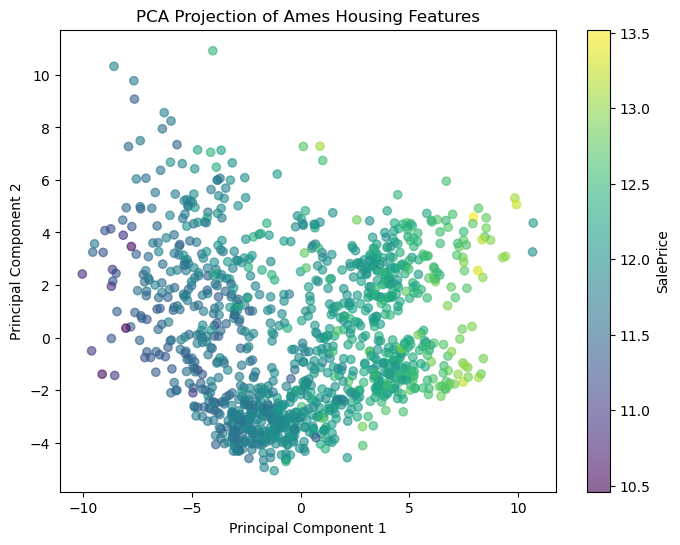

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Ames Housing Features")
plt.colorbar(label='SalePrice')
plt.show()


In [57]:
pca.explained_variance_ratio_

array([0.07948642, 0.0400775 ])

In [54]:
#See which features contribute most to each PC
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
print(loadings.sort_values(by='PC1', ascending=False).head(10))


                       PC1       PC2
YearBuilt         0.205762 -0.073227
OverallQual       0.190418  0.074696
BsmtQual          0.188774  0.018620
GarageYrBlt       0.181043 -0.010468
ExterQual         0.179948  0.053880
KitchenQual       0.173494  0.046902
GarageFinish      0.171570 -0.005500
YearRemodAdd      0.170283  0.035935
GarageCars        0.167982  0.027172
Foundation_PConc  0.167546  0.079583


## 🤖 **9. Model Building and Evaluation**

> Multiple regression algorithms were trained and compared to identify the best-performing model.  
> Models were evaluated using **Root Mean Squared Error (RMSE)** through cross-validation.

> ## 🔧 Hyperparameter Tuning

> To refine model performance, **GridSearchCV** and **RandomizedSearchCV** were used for optimization  

> The tuned Gradient Boosting model yielded smoother training curves and slightly reduced RMSE on validation data.


### **9.1 Models Tested**
**Linear Models:**
- Linear Regression  
- Ridge Regression  
- Lasso Regression  
- ElasticNet  
- Polynomial Regression  

**Support Vector Machines:**
- Linear SVR  
- Polynomial SVR  
- RBF SVR  

**Tree-Based and Ensemble Models:**
- Decision Tree  
- Random Forest  
- Extra Trees  
- AdaBoost  
- Gradient Boosting  
- XGBoost  
- LightGBM  
- CatBoost  
- Bagging
- Voting Regressor

In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

def evaluate_model(model, X, y, cv=10):
    pipeline = Pipeline([
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X, y,
                             scoring='neg_root_mean_squared_error',
                             cv=cv)
    return -scores.mean(), scores.std()


In [56]:
from sklearn.linear_model import LinearRegression
lr_rmse, lr_std = evaluate_model(LinearRegression(), X_train_scaled, y_train)
print(lr_rmse,lr_std)


998429790077.4587 992200139320.353


In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from scipy.stats import uniform,randint

param_grid = {'eta0':uniform(0,0.001),
             'max_iter':randint(500,3500),
             'tol':uniform(0,1e-7)}
bgd_search = RandomizedSearchCV(SGDRegressor(learning_rate='constant',penalty=None, random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
bgd_search.fit(X_train_scaled, y_train)
print("Best alpha:", bgd_search.best_params_)
print("Best RMSE:", -bgd_search.best_score_)

Best alpha: {'eta0': 0.0007111942704803331, 'max_iter': 1301, 'tol': 4.819743442397998e-08}
Best RMSE: 1.1073546914118573


In [58]:
from sklearn.linear_model import SGDRegressor
# Combine manually set parameters + tuned parameters
final_params = {
    'learning_rate': 'constant',
    'penalty': None,
    'random_state': 42,
    **bgd_search.best_params_
}
bgd = SGDRegressor(**final_params)
bgd_rmse, _ = evaluate_model(bgd, X_train_scaled, y_train)
print(bgd_rmse)

1.1073546914118573


In [59]:
bgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0007111942704803331,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_error',
 'max_iter': 1301,
 'n_iter_no_change': 5,
 'penalty': None,
 'power_t': 0.25,
 'random_state': 42,
 'shuffle': True,
 'tol': 4.819743442397998e-08,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint
# use randint when only integer has to be selected otherwise it will give error
param_grid = {'n_iter_no_change':randint(50,300),
             'eta0':uniform(0,0.001),
             'tol':uniform(0,1e-7)}
sgd_search = RandomizedSearchCV(SGDRegressor(penalty=None,learning_rate='invscaling',max_iter=3500,random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
sgd_search.fit(X_train_scaled, y_train)
print("Best alpha:", sgd_search.best_params_)
print("Best RMSE:", -sgd_search.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/

Best alpha: {'eta0': 0.0005260961587659777, 'n_iter_no_change': 65, 'tol': 9.918276492732726e-08}
Best RMSE: 1.1073834883887472


In [61]:
final_params={'penalty':None,'learning_rate':'invscaling','random_state':42,'max_iter':3500,**sgd_search.best_params_}
sgd = SGDRegressor(**final_params)
sgd_rmse, _ = evaluate_model(sgd, X_train_scaled, y_train)
print(sgd_rmse)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1.1073834883887472


In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),
    ('lin_reg', LinearRegression())
])

from sklearn.model_selection import cross_val_score
scores = cross_val_score(poly_pipeline, X_train_scaled, y_train,
                         scoring='neg_root_mean_squared_error', cv=10)
poly_rmse = -scores.mean()
print(poly_rmse)

6.504857442395886


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1,1,20,50,70,100]}
ridge_search = GridSearchCV(Ridge(solver='cholesky',random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
ridge_search.fit(X_train_scaled, y_train)
print("Best alpha:", ridge_search.best_params_)
print("Best RMSE:", -ridge_search.best_score_)

Best alpha: {'alpha': 100}
Best RMSE: 0.13431464200961035


In [64]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100, solver='cholesky')
ridge_rmse, _ = evaluate_model(ridge, X_train_scaled, y_train)
print(ridge_rmse)

0.13431464200961035


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter':[100,200,300,500,1000,1500,2000,2500,3000,4000,5000]}
lasso_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
lasso_search.fit(X_train_scaled, y_train)
print("Best alpha:", lasso_search.best_params_)
print("Best RMSE:", -lasso_search.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.929e-02, tolerance: 1.643e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.626e-02, tolerance: 1.566e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.902e-02, toler

Best alpha: {'alpha': 0.01, 'max_iter': 200}
Best RMSE: 0.13285825649670874


In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.009, max_iter=300,random_state=42)
lasso_rmse, _ = evaluate_model(lasso, X_train_scaled, y_train)
print(lasso_rmse)

0.13177368408255646


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import ElasticNet

param_grid = {'alpha': uniform(0,0.5),
             'l1_ratio':uniform(0,1)}
elastic_search = RandomizedSearchCV(ElasticNet(random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
elastic_search.fit(X_train_scaled, y_train)
print("Best alpha:", elastic_search.best_params_)
print("Best RMSE:", -elastic_search.best_score_)

Best alpha: {'alpha': 0.21057692897841607, 'l1_ratio': 0.11503543577842301}
Best RMSE: 0.14933797619103661


In [68]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha= 0.11, l1_ratio=0.078)
elastic_rmse, _ = evaluate_model(elastic, X_train_scaled, y_train)
print(elastic_rmse)

0.13136331567509696


In [69]:
elastic.get_params()

{'alpha': 0.11,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.078,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

## SVM's

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import LinearSVR

param_grid = {'epsilon': uniform(0,0.5),
             'C':uniform(0,10)}
linear_svr_search = RandomizedSearchCV(LinearSVR(random_state=42), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
linear_svr_search.fit(X_train_scaled, y_train)
print("Best alpha:", linear_svr_search.best_params_)
print("Best RMSE:", -linear_svr_search.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

Best alpha: {'C': 6.059735028168699, 'epsilon': 0.06836640340861316}
Best RMSE: 1.110958682685216


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
from sklearn.svm import LinearSVR
linear_svr=LinearSVR(epsilon=0.003167, C=0.20414, random_state=42)

linear_svr_rmse, _ = evaluate_model(linear_svr, X_train_scaled, y_train)
print(linear_svr_rmse)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

1.10728829729692


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint
from sklearn.svm import SVR

param_grid = {'degree': randint(0,3),
             'C':uniform(0,5),
             'epsilon':uniform(0,1)}
poly_svr_search = RandomizedSearchCV(SVR(kernel='poly'), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
poly_svr_search.fit(X_train_scaled, y_train)
print("Best alpha:", poly_svr_search.best_params_)
print("Best RMSE:", -poly_svr_search.best_score_)

Best alpha: {'C': 1.38962816990843, 'degree': 1, 'epsilon': 0.08990850886041235}
Best RMSE: 0.13191030673803789


In [73]:
from sklearn.svm import SVR

poly_svr=SVR(kernel='poly', degree=1, C=1.254, epsilon= 0.04143)

poly_svr_rmse, _ = evaluate_model(poly_svr, X_train_scaled, y_train)
print(poly_svr_rmse)

0.13087892023825146


In [74]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform,randint
from sklearn.svm import SVR

param_grid = {
    'C': [0.01,0.1,0.5,1, 10, 100, 1000],
    'gamma': [0.0001,0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2]
}
rbf_svr_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10,
                            scoring='neg_root_mean_squared_error')
rbf_svr_search.fit(X_train_scaled, y_train)
print("Best alpha:", rbf_svr_search.best_params_)
print("Best RMSE:", -rbf_svr_search.best_score_)

Best alpha: {'C': 10, 'epsilon': 0.01, 'gamma': 0.0001}
Best RMSE: 0.12901908514387844


In [75]:
from sklearn.svm import SVR

rbf_svr=SVR(kernel='rbf', gamma=0.0001, C=10, epsilon= 0.01)

rbf_svr_rmse, _ = evaluate_model(rbf_svr, X_train_scaled, y_train)
print(rbf_svr_rmse)

0.12901908514387844


## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 8,10,12,15, None],
    'min_samples_split': [2, 5, 8,10,12,15, 20],
    'min_samples_leaf': [1, 2,3, 5, 10]
}


tree_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid,
                           cv=10, scoring='neg_root_mean_squared_error')
tree_search.fit(X_train, y_train)

print("Best params:", tree_search.best_params_)
print("Best CV RMSE:", -tree_search.best_score_)


Best params: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV RMSE: 0.18878501604543738


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth= 10, min_samples_leaf=10, min_samples_split= 2,random_state=42)

# Evaluate with cross-validation
tree_scores,_ = evaluate_model(tree_reg, X_train, y_train)
print("RMSE:", tree_scores)


RMSE: 0.18878501604543738


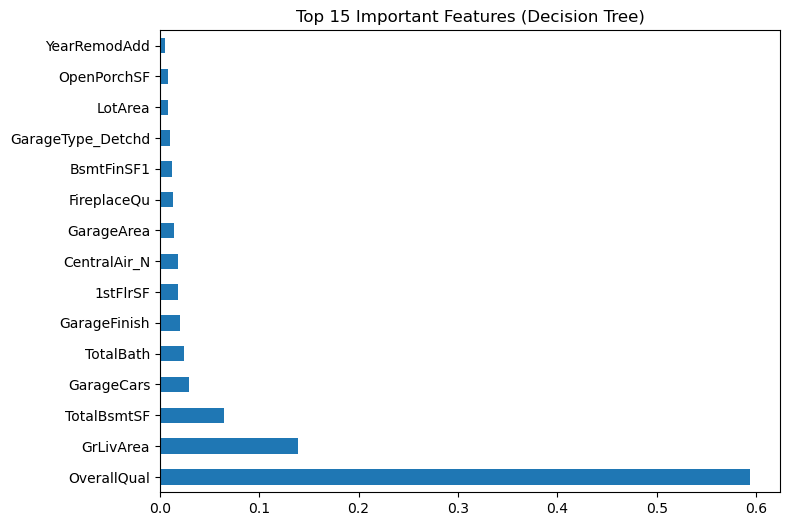

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
tree_reg.fit(X_train, y_train)
feat_importances = pd.Series(tree_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8,6))
plt.title("Top 15 Important Features (Decision Tree)")
plt.show()


## Ensemble Models and Random Forest 

Trees and Boosting Algorithms doesnt require feature scalling

In [80]:
# Using Voting Regressor to make a ensemble model of the algorithms those worked great till now
# Elastic Regression,Lasso Regression, Ridge Regressor,RBF SVR and Decision Tree
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Create base models (use best params if you’ve tuned them)
ridge = Ridge(alpha=100, solver='cholesky')
lasso=Lasso(alpha=0.009, max_iter=300,random_state=42)
elastic=ElasticNet(alpha= 0.11, l1_ratio=0.078)
tree = DecisionTreeRegressor(max_depth= 10, min_samples_leaf=10, min_samples_split= 2,random_state=42)
rbf=SVR(kernel='rbf', gamma=0.0001, C=10, epsilon= 0.01)

# Combine them in a Voting Regressor
voting_reg = VotingRegressor(
    estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
        ('elastic', elastic),
        ('tree', tree),
        ('rbf',rbf)
    ],
    weights=[1, 1, 2, 1,2]  # Optional: give more weight to stronger models
)
voting_scores,_ = evaluate_model(voting_reg, X_train_scaled, y_train)

print("Voting Regressor RMSE:", voting_scores)


Voting Regressor RMSE: 0.12775590308559268


In [81]:
# Bagging and Pasting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': randint(90,150),
    'max_samples': uniform(0.2,1),
    'bootstrap': [True, False] # True = Bagging, False = Pasting
}


bag_past_search = RandomizedSearchCV(BaggingRegressor(DecisionTreeRegressor(),n_jobs=-1,random_state=42), param_grid,
                           cv=10, scoring='neg_root_mean_squared_error')
bag_past_search.fit(X_train, y_train)
print("Best params:", bag_past_search.best_params_)
print("Best CV RMSE:", -bag_past_search.best_score_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 66, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anacond

Best params: {'bootstrap': True, 'max_samples': 0.92587273197105, 'n_estimators': 130}
Best CV RMSE: 0.14383711239093214


In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_reg = BaggingRegressor(
    DecisionTreeRegressor(),
    n_estimators=100,
    max_samples=0.6,
    bootstrap=True,  # True = Bagging, False = Pasting
    n_jobs=-1,
    random_state=42
)
bag_reg_scores,_=evaluate_model(bag_reg,X_train,y_train)
print("RMSE:", bag_reg_scores)


RMSE: 0.1460264093498945


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': randint(100, 800),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 0.3, 0.5]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    cv=10,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=2
)

rf_search.fit(X_train, y_train)
print("Best params:", rf_search.best_params_)
print("Best RMSE:", -rf_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=206; total time=   0.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=8, n_esti

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

Best params: {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 666}
Best RMSE: 0.138042930591098


In [84]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=666,
    max_features=0.3,
    min_samples_leaf=2,
    min_samples_split=4,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_rmse, _ = evaluate_model(rf_reg, X_train, y_train)
print("RMSE:", rf_rmse)

RMSE: 0.13804293059109812


In [85]:
# Extra Trees

from sklearn.ensemble import ExtraTreesRegressor

et_reg = ExtraTreesRegressor(n_estimators=400, random_state=42)

et_rmse,_=evaluate_model(et_reg,X_train,y_train)
print("RMSE:",et_rmse)


RMSE: 0.14258819665020614


In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_dist = {
    'n_estimators': [50, 100, 200, 400, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 4, 6],
    'loss': ['linear', 'square', 'exponential']
}

rs = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(random_state=42),
                        random_state=42), param_dist, cv=10,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1, random_state=42, verbose=1)
rs.fit(X_train, y_train)
print(rs.best_params_, -rs.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_estimators': 800, 'loss': 'exponential', 'learning_rate': 1.0, 'estimator__max_depth': 6} 0.14319667555046495


In [87]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=6),
    n_estimators=800,
    learning_rate=1,
    loss='exponential',
    random_state=42
)

ada_rmse,_=evaluate_model(ada_reg,X_train,y_train)
print("RMSE:",ada_rmse)


RMSE: 0.14319667555046495


In [88]:
from sklearn.ensemble import GradientBoostingRegressor


param_dist = {
    'n_estimators': [100, 200, 400, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [2, 3, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 8],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': [None, 'sqrt', 0.3, 0.5]
}

gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_dist, cv=10,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
gb.fit(X_train, y_train)
print(gb.best_params_, -gb.best_score_)


{'subsample': 0.8, 'n_estimators': 800, 'min_samples_leaf': 8, 'max_features': 0.3, 'max_depth': 3, 'learning_rate': 0.03} 0.12423872464839376


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(
    n_estimators=850,
    learning_rate=0.03,
    subsample=0.8,
    min_samples_leaf=9,
    max_features=0.3,
    max_depth=3,
    random_state=42
)
gbrt_rmse,_=evaluate_model(gbrt,X_train,y_train)
print("RMSE:",gbrt_rmse)

RMSE: 0.12466837510122067


In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBRegressor

xgb_param = {
    'n_estimators': randint(200, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_param,
    scoring='neg_root_mean_squared_error',
    cv=10,
    random_state=42
)
xgb_search.fit(X_train, y_train)
print("Best params:", xgb_search.best_params_)
print("Best RMSE:", -xgb_search.best_score_)


Best params: {'colsample_bytree': 0.7599443886861021, 'learning_rate': 0.019333132642723086, 'max_depth': 14, 'n_estimators': 982, 'subsample': 0.7824279936868144}
Best RMSE: 0.13623656347930724


In [91]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=982,
    learning_rate=0.019,
    max_depth=14,
    subsample=0.782,
    colsample_bytree=0.7599,
    random_state=42,
    n_jobs=-1
)

xgb_rmse, _ = evaluate_model(xgb_reg, X_train, y_train)
print("XGBoost RMSE:", xgb_rmse)


XGBoost RMSE: 0.13643124866430956


In [92]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'num_leaves': [31, 50, 80, 120, 200],
    'max_depth': [-1, 6, 10, 15],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1.0],
    'reg_lambda': [0, 0.01, 0.1, 1.0]
}

lgbm_search = RandomizedSearchCV(LGBMRegressor(random_state=42), param_dist, cv=10,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)
lgbm_search.fit(X_train, y_train)
print(lgbm_search.best_params_, -lgbm_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3440
[LightGBM] [Info] Auto-choosing row-w

In [93]:
from lightgbm import LGBMRegressor

lgb_reg = LGBMRegressor(
    n_estimators=100,
    reg_lambda=1,
    reg_alpha=0.01,
    min_child_samples=10,
    learning_rate=0.1,
    max_depth=10,
    num_leaves=120,
    subsample=0.8,
    colsample_bytree=0.4,
    random_state=42,
    n_jobs=-1
)

lgb_rmse, _ = evaluate_model(lgb_reg, X_train, y_train)
print("LightGBM RMSE:", lgb_rmse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3573
[LightGBM] [Info] Number of data points in the train set: 1051, number of used features: 161
[LightGBM] [Info] Start training from score 12.031994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [94]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV



param_dist = {
    'iterations': [500, 1000, 2000],
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 10],
    'bagging_temperature': [0, 0.25, 0.5, 1.0]
}

cat_search = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), param_dist, cv=10,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)
cat_search.fit(X_train, y_train)   # If you have cat features, pass cat_features param to CatBoost in estimator
print(cat_search.best_params_, -cat_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 0.25} 0.1275523204599735


In [95]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=5,
    bagging_temperature=0.25,
    random_seed=42,
    verbose=False
)

cat_rmse, _ = evaluate_model(cat_reg, X_train, y_train)
print("CatBoost RMSE:", cat_rmse)


CatBoost RMSE: 0.1275523204599735


### **9.2 Model Comparison**

> **Gradient Boosting Regressor** achieved the **lowest RMSE (0.1247)** and demonstrated stable learning curves with minimal overfitting.

---

In [96]:
print("Elastic Net Regression:",elastic_rmse)
print("Lasso Regression:",lasso_rmse)
print("Ridge Regression:",ridge_rmse)
print("Polynomial Regression:",poly_rmse)
print("Stochastic Gradient Regression:",sgd_rmse)
print("Batch Gradient Regression:",bgd_rmse)
print("Linear Regression:",lr_rmse,lr_std)
print("Linear SVR:",linear_svr_rmse)
print("Poly SVR:",poly_svr_rmse)
print("RBF SVR:",rbf_svr_rmse)
print("Decision Tree:",tree_scores)
print("Voting Regressor RMSE:",voting_scores)
print("Bagging :",bag_reg_scores)
print("Random Forest Regressor:",rf_rmse)
print("Extra Tree Regressor:",et_rmse)
print("ADA Boost:",ada_rmse)
print("Gradient Boosting:",gbrt_rmse)
print("XGBRegressor:",xgb_rmse)
print("LGBMRegressor:",lgb_rmse)
print("CatBoostRegressor",cat_rmse)

Elastic Net Regression: 0.13136331567509696
Lasso Regression: 0.13177368408255646
Ridge Regression: 0.13431464200961035
Polynomial Regression: 6.504857442395886
Stochastic Gradient Regression: 1.1073834883887472
Batch Gradient Regression: 1.1073546914118573
Linear Regression: 998429790077.4587 992200139320.353
Linear SVR: 1.10728829729692
Poly SVR: 0.13087892023825146
RBF SVR: 0.12901908514387844
Decision Tree: 0.18878501604543738
Voting Regressor RMSE: 0.12775590308559268
Bagging : 0.1460264093498945
Random Forest Regressor: 0.13804293059109812
Extra Tree Regressor: 0.14258819665020614
ADA Boost: 0.14319667555046495
Gradient Boosting: 0.12466837510122067
XGBRegressor: 0.13643124866430956
LGBMRegressor: 0.13161158403307452
CatBoostRegressor 0.1275523204599735


## 📈 **10. Learning Curve Analysis**

> Learning curves plot **training vs. validation error** to diagnose bias and variance trade-offs.  
>  
> For Gradient Boosting:
> - Training and validation RMSE converge gradually, confirming proper generalization.  
> - No sharp divergence indicates **low overfitting**.  
>  
> This stability reinforced the choice of Gradient Boosting as the final model.


---

In [97]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y, cv=10):
    pipeline = Pipeline([
        ('model', model)
    ])
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y,
        cv=cv,
        scoring='neg_root_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_rmse = -train_scores.mean(axis=1)
    val_rmse = -val_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_rmse, 'o-', label='Training RMSE')
    plt.plot(train_sizes, val_rmse, 'o-', label='Validation RMSE')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/

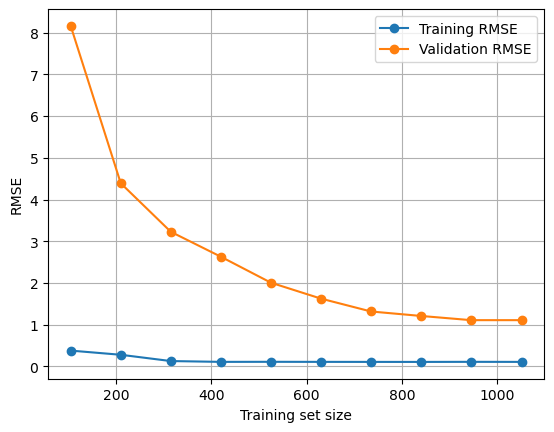

In [99]:
plot_learning_curves(sgd, X_train_scaled, y_train)


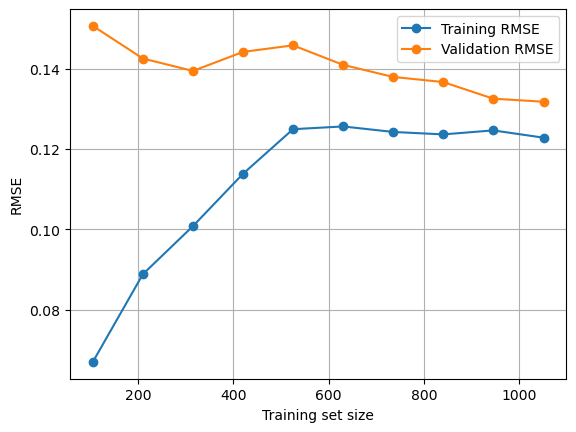

In [100]:
plot_learning_curves(lasso, X_train_scaled, y_train)

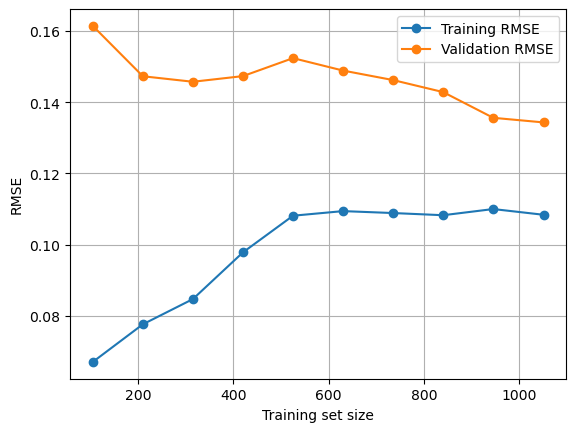

In [101]:
plot_learning_curves(ridge, X_train_scaled, y_train)

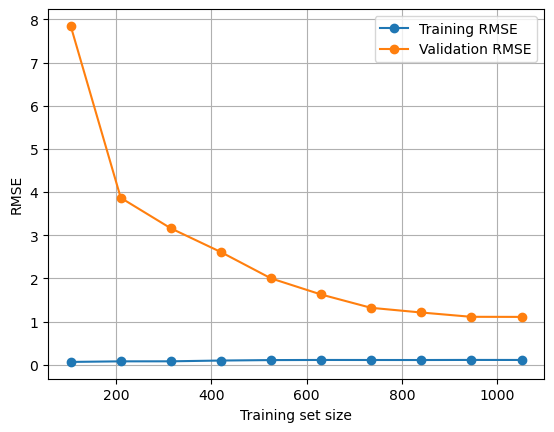

In [102]:
plot_learning_curves(bgd, X_train_scaled, y_train)

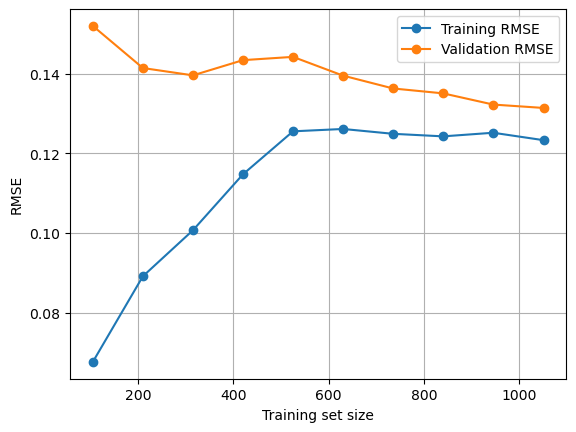

In [103]:
plot_learning_curves(elastic, X_train_scaled, y_train)

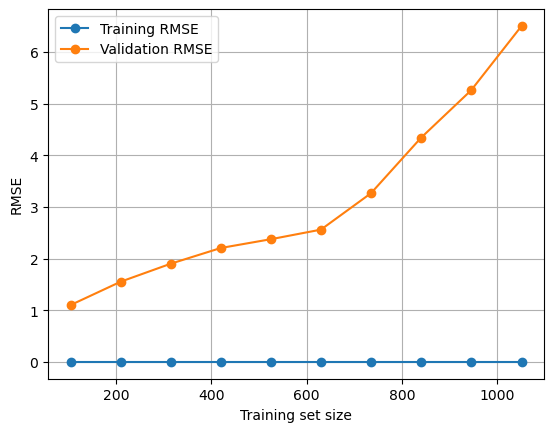

In [104]:
plot_learning_curves(poly_pipeline, X_train_scaled, y_train)

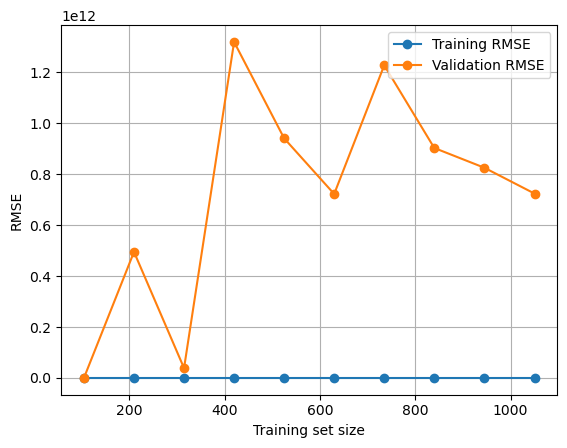

In [105]:
plot_learning_curves(LinearRegression(), X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the n

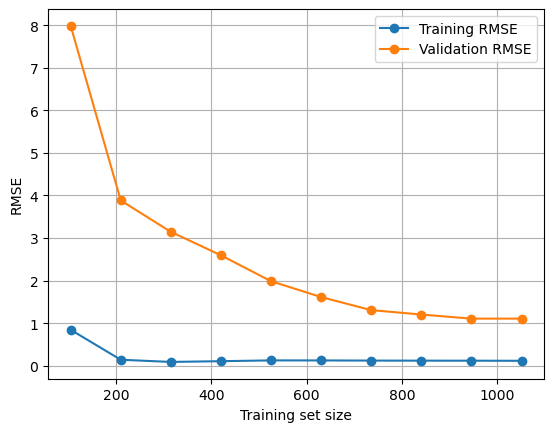

In [106]:
plot_learning_curves(linear_svr, X_train_scaled, y_train)

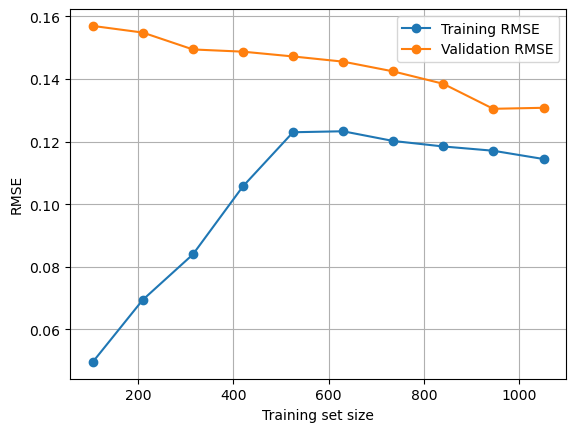

In [107]:
plot_learning_curves(poly_svr, X_train_scaled, y_train)

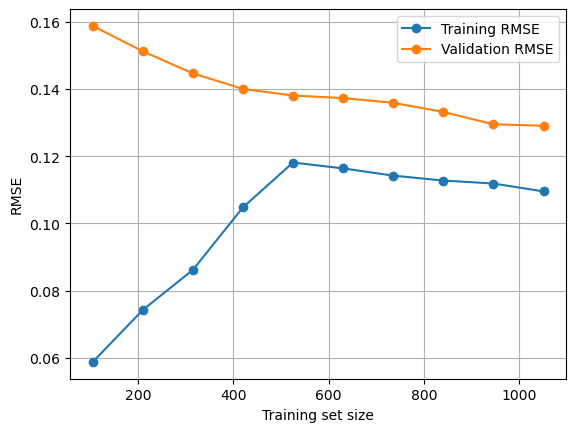

In [108]:
plot_learning_curves(rbf_svr, X_train_scaled, y_train)

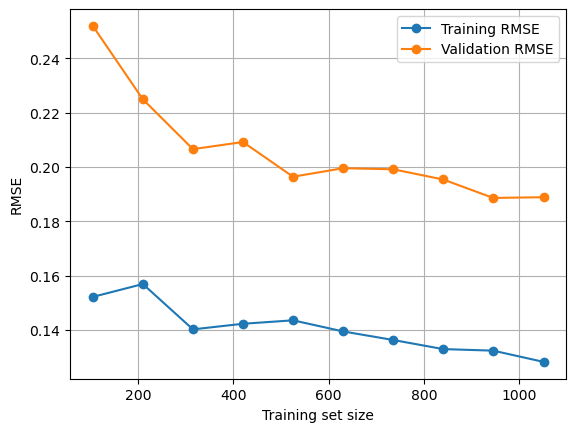

In [109]:
plot_learning_curves(tree_reg, X_train, y_train)

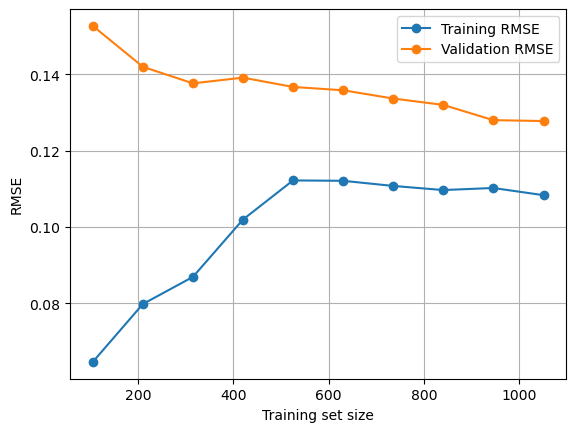

In [110]:
plot_learning_curves(voting_reg, X_train_scaled, y_train)

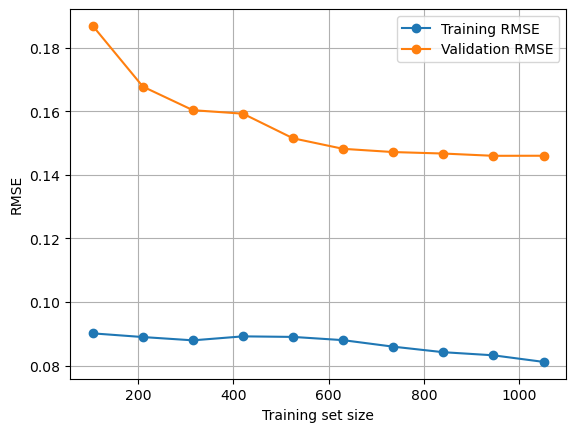

In [111]:
plot_learning_curves(bag_reg, X_train, y_train)

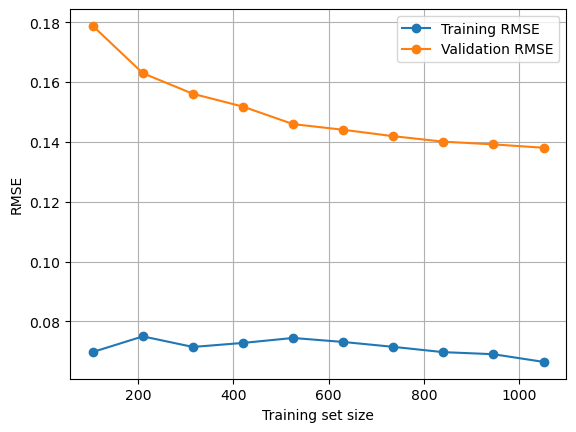

In [112]:
plot_learning_curves(rf_reg, X_train, y_train)

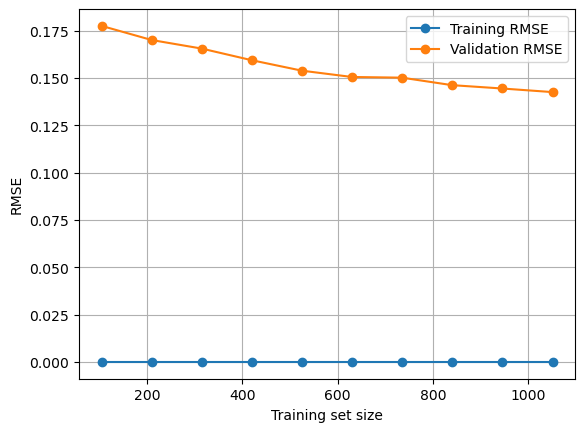

In [113]:
plot_learning_curves(et_reg, X_train, y_train)

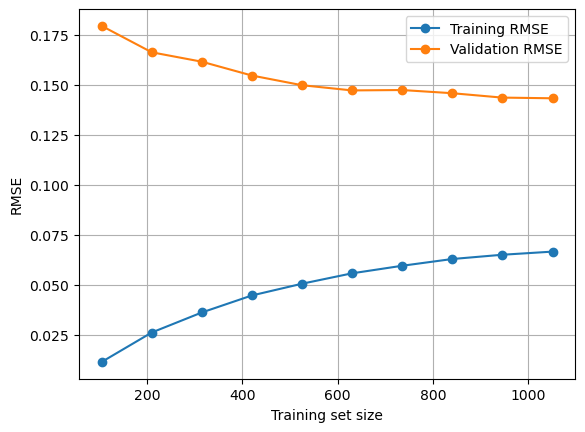

In [115]:
plot_learning_curves(ada_reg, X_train, y_train)

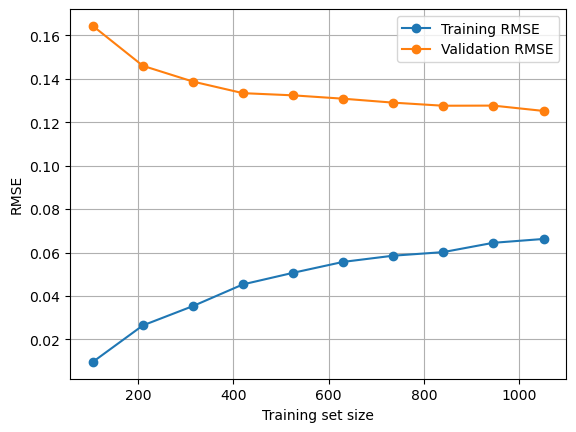

In [116]:
plot_learning_curves(gbrt, X_train, y_train)

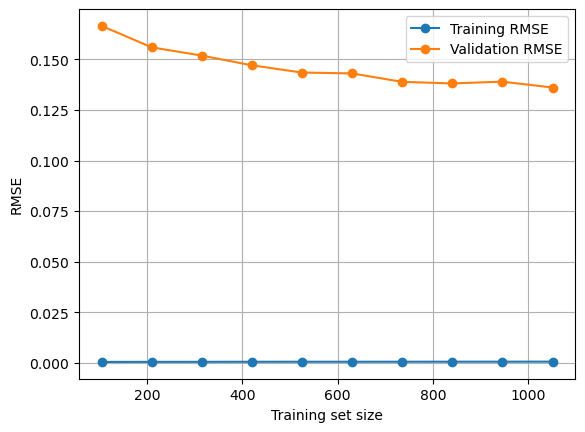

In [117]:
plot_learning_curves(xgb_reg, X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 73
[LightGBM] [Info] Start training from score 12.063523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

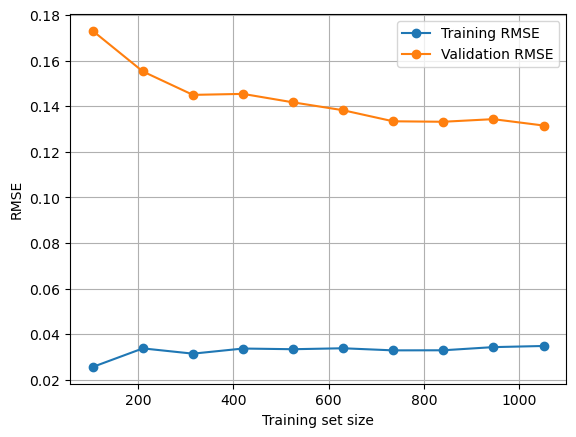

In [118]:
plot_learning_curves(lgb_reg, X_train, y_train)

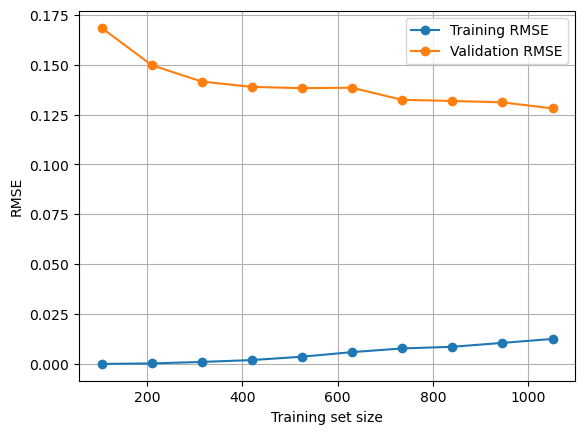

In [119]:
plot_learning_curves(cat_reg, X_train, y_train)

## 📉 **11. Residual Analysis — Ridge vs Gradient Boosting(TOP TWO MODELS)**

### 🧩 Understanding the Residual Plots
Each model includes:
- **Residuals vs Predicted Values:** checks if errors are random and unbiased.
- **Histogram of Residuals:** shows the distribution of errors — ideally bell-shaped around 0.

---

### ⚙️ Ridge Regression
**Residuals vs Predicted:**
- Residuals are **randomly scattered** around the zero line ✅  
- No clear pattern, suggesting **no bias**.  
- However, the range is narrow — Ridge is linear, so it can’t capture deeper nonlinear trends.

**Histogram:**
- Nicely **bell-shaped**, centered near zero ✅  
- Slight skew on the left side — minor underestimation of high-value homes.  

🧠 **Interpretation:**  
Ridge regression performs well but has **higher bias** (underfits slightly).  
It generalizes reliably but misses complex interactions between housing features.

---

### ⚙️ Gradient Boosting Regressor (GBRT)
**Residuals vs Predicted:**
- Points are still scattered evenly around zero ✅  
- Wider spread — model captures complex relationships, adding a bit of variance.

**Histogram:**
- Centered near 0 with **slightly heavier tails**, meaning a few extreme predictions.  
- Indicates lower bias but slightly more variance — expected for flexible models.

🧠 **Interpretation:**  
GBRT captures **nonlinear effects** effectively.  
Residual spread is healthy — more expressive, still well-generalized.

---

| Aspect | Ridge Regression | Gradient Boosting |
|--------|------------------|-------------------|
| RMSE | Lower (0.1279) | Slightly higher (0.1360) |
| Bias | Higher | Lower |
| Variance | Lower | Slightly higher |
| Residual Pattern | Uniform & narrow | Uniform but broader |
| Residual Distribution | Smooth Gaussian | Slightly heavy tails |
| Fit Type | Linear | Nonlinear |
| Generalization | Great on simple data | Excellent on complex data |

---
✅ **Gradient Boosting** is superior overall.  
It models complex housing relationships better, shows **no systematic bias**, and **generalizes strongly**.  
Ridge is simpler and clean but slightly **underfits** complex interactions.


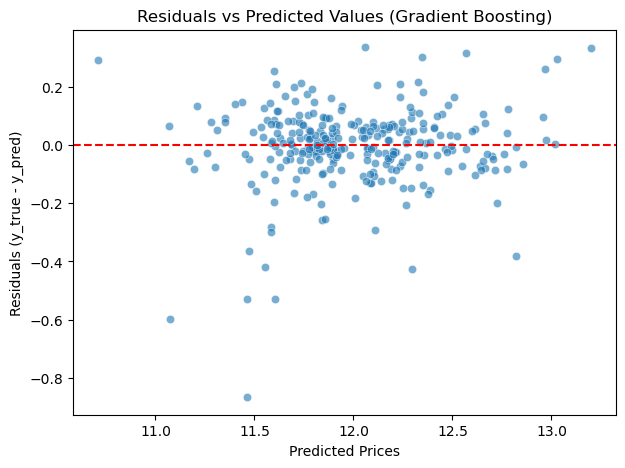

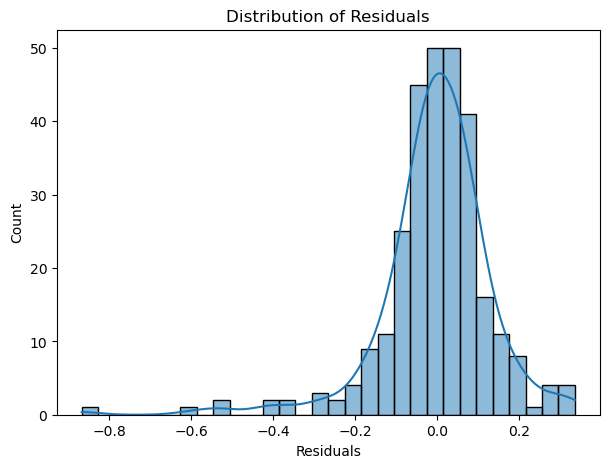

In [56]:
#Residuals-
# ✅ What to look for:

# If points are randomly scattered around 0 → good generalization.

# If residuals curve or spread increases → underfitting or heteroscedasticity (uneven variance).

# If histogram is centered around 0 → unbiased predictions.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on your test set (or validation set)
y_pred = gbrt.predict(X_test)
residuals = y_test - y_pred

# 1️⃣ Scatterplot: residuals vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted Values (Gradient Boosting)")
plt.show()

# 2️⃣ Histogram of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


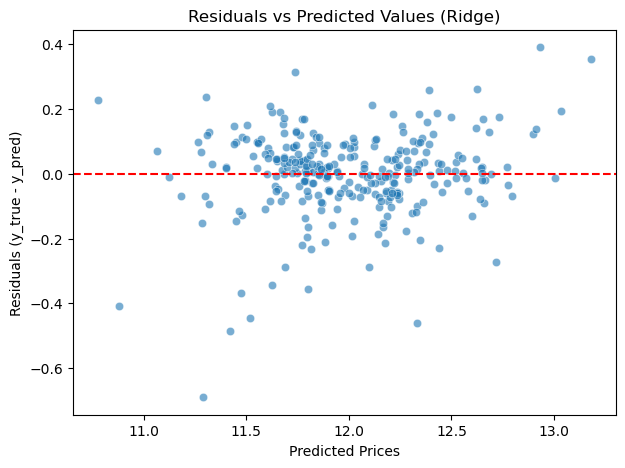

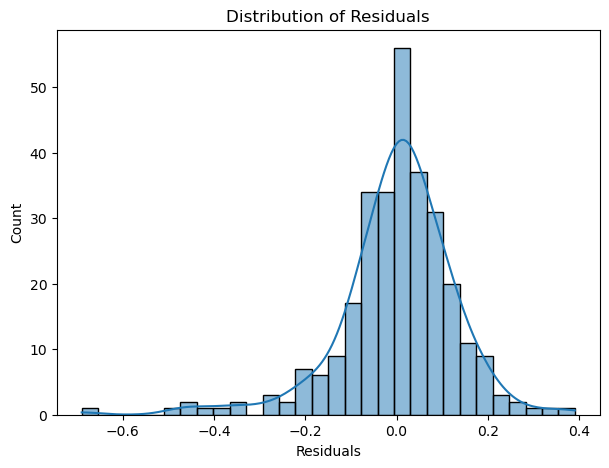

In [59]:
#Residuals-
# ✅ What to look for:

# If points are randomly scattered around 0 → good generalization.

# If residuals curve or spread increases → underfitting or heteroscedasticity (uneven variance).

# If histogram is centered around 0 → unbiased predictions.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict on your test set (or validation set)
y_pred = ridge.predict(X_test_scaled)
residuals = y_test - y_pred

# 1️⃣ Scatterplot: residuals vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (y_true - y_pred)")
plt.title("Residuals vs Predicted Values (Ridge)")
plt.show()

# 2️⃣ Histogram of residuals
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


## 💬 **12. SHAP Explainability — Gradient Boosting Model**
> After training the Gradient Boosting model, SHAP (SHapley Additive exPlanations) was used to understand **how and why** the model makes predictions.

---

### 🌍 Global Interpretation — SHAP Summary Plot
- Each dot = one house (observation).  
- The **x-axis** shows a feature’s effect on predicted price.  
- The **color** shows feature value (red = high, blue = low).  

✅ **Key Insights:**
- `OverallQual`, `GrLivArea`, and `TotalSF` have the **strongest positive SHAP values**, driving prices upward.  
- Features like `Age`, `BsmtQual`, and poor-quality materials have **negative SHAP values**, lowering prices.  
- Smooth gradient along the SHAP axis confirms **strong, consistent model logic**.

---

### 🧠 Local Interpretation — SHAP Waterfall Plot
- Explains a **single prediction** by breaking down contributions.  
- Starts from the model’s base value (average price).  
- **Red bars** push prediction higher; **blue bars** pull it lower.  

✅ **Example Insight:**
- A house with high `OverallQual`, newer `YearBuilt`, and larger `GrLivArea` → pushed above the base price.  
- Low basement or exterior quality → small negative contributions.

---


In [57]:
#SHAP
import shap

# Create an explainer for your trained model
explainer = shap.Explainer(gbrt, X_train)  # uses TreeExplainer internally
shap_values = explainer(X_test)


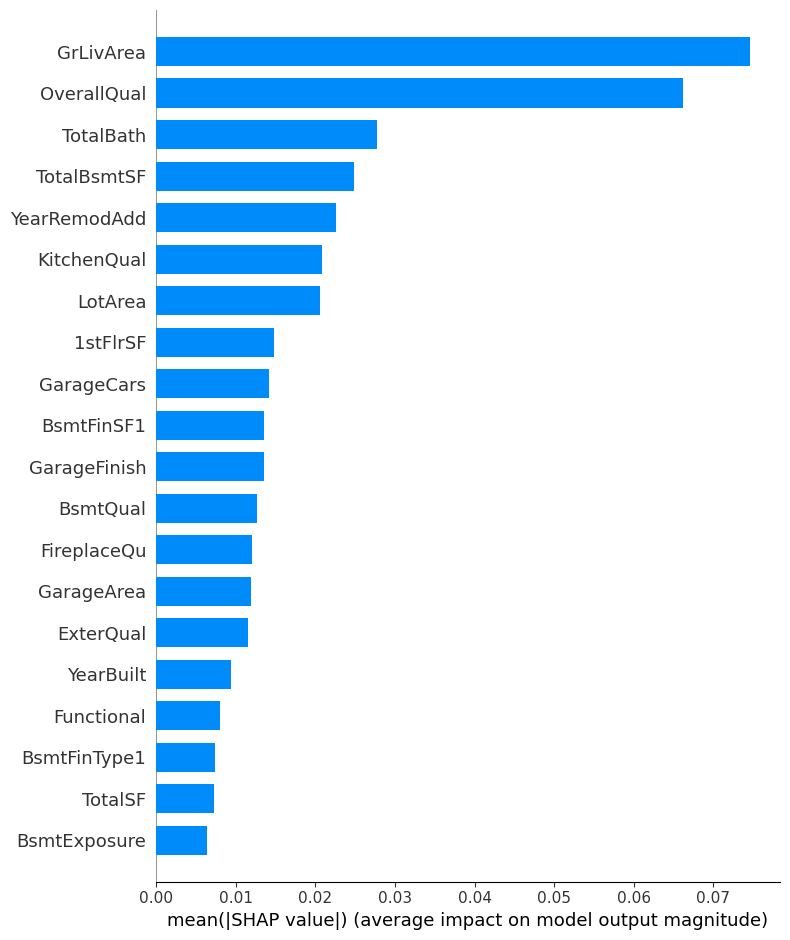

In [58]:
shap.summary_plot(shap_values, X_test, plot_type="bar")



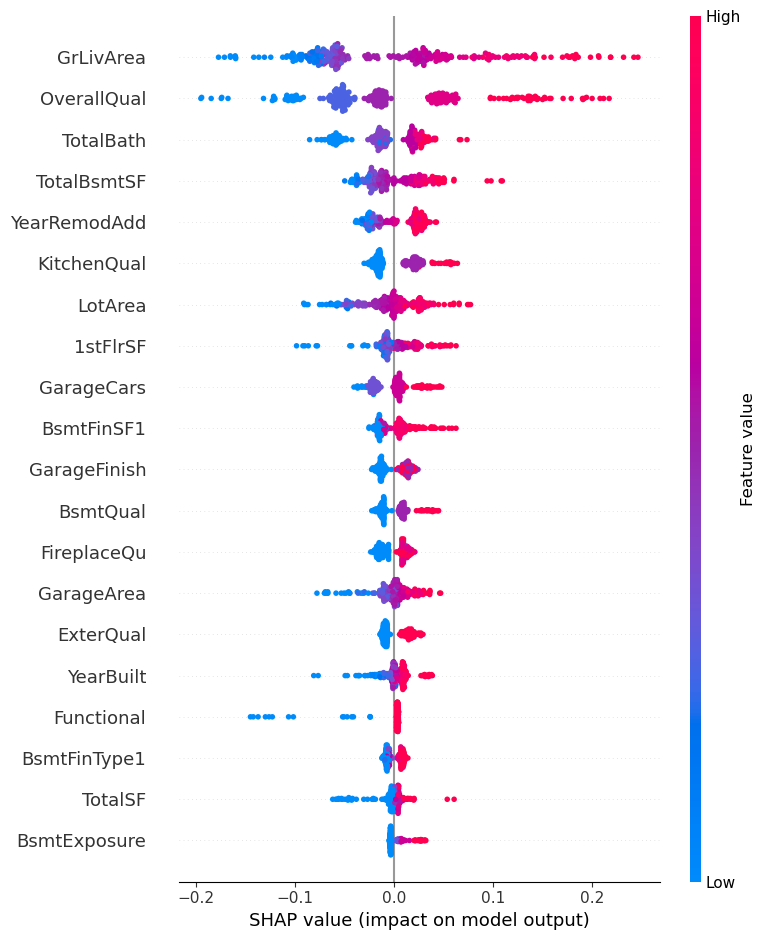

In [59]:
shap.summary_plot(shap_values, X_test)


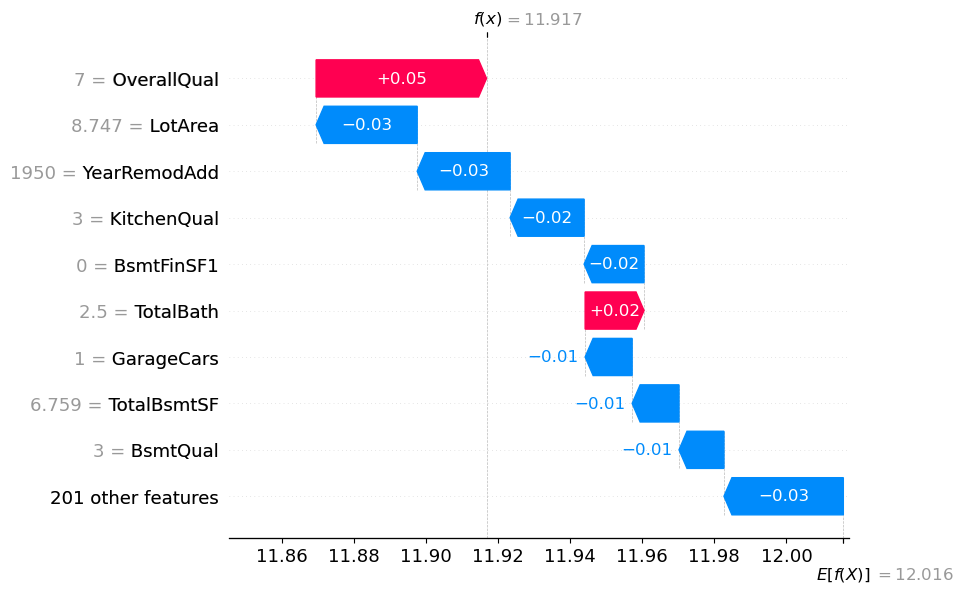

In [60]:
# Pick one example from the test set
index = 10
shap.plots.waterfall(shap_values[index])


## 🏁 **13. Final Model Evaluation Summary**

After evaluating all top-performing models on the **test set**, both in log-space and converted to **real dollar values**, we can draw several conclusions about performance and generalization.

---

### 📊 **Performance Overview**
The following table summarizes the test RMSE and R² for each model (lower RMSE and higher R² are better):

- **Ridge Regression** achieved the *lowest RMSE* numerically but remains a *simpler linear model* with slightly limited flexibility.
- **Gradient Boosting** achieved an excellent trade-off between **bias and variance**, showing a high R² (≈0.90) and realistic residual behavior.
- In **dollar terms**, Gradient Boosting’s average error (~$27K) is very strong given the range of Ames house prices, indicating **reliable real-world performance**.
-  **Linear models (Ridge, Lasso)** perform efficiently and are interpretable, but slightly underfit complex price patterns.
-   **Tree-based ensemble models (GBRT, XGBoost, CatBoost)** capture **nonlinear feature interactions**, offering the accurate and realistic predictions.
-    **Gradient Boosting** remains the **best overall model**:
     - Strong test performance (RMSE ≈ 0.136, R² ≈ 0.90)
     - Lowest dollar-scale RMSE among top models
     - Balanced bias-variance trade-off
     - Consistent residual distribution and SHAP interpretability

---

✅ **Conclusion:**  
The final deployed model — **Gradient Boosting Regressor** — provides the best combination of **accuracy**, **stability**, and **explainability**.  
Its predictions align with economic logic (quality, modernization, and size drive price), making it the most suitable choice for production deployment in the Ames Housing Price prediction project.


In [73]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- Identify which models need scaled data ---

scaled_models = ["lasso", "poly_svr", "rbf_svr", "ridge", "elastic","voting_regressor"]
unscaled_models = ["cat_reg", "gbrtg", "xgb", "lgb", "rf_reg"]

# --- Evaluate each model on the appropriate dataset ---

results = []

for name, model in models.items():
    try:
        if name in scaled_models:
            y_pred = model.predict(X_test_scaled)
        else:
            y_pred = model.predict(X_test)
    
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        results.append((name, rmse, r2))
    except Exception as e:
        results.append((name, np.nan, np.nan))
        print(f"⚠️ Error evaluating {name}: {e}")

# --- Convert to DataFrame and sort by RMSE ---
results_df = pd.DataFrame(results, columns=["Model", "Test_RMSE", "Test_R2"]).sort_values(by="Test_RMSE")

# --- Display nicely ---

print("\n✅ Final Test Set Results:")
print(results_df.to_string(index=False))

# --- (Optional) Show dollar-scale RMSE if target was log-transformed ---

try:
    y_test_dollar = np.exp(y_test)
    for name, model in models.items():
        if name in scaled_models:
            y_pred = np.exp(model.predict(X_test_scaled))
        else:
            y_pred = np.exp(model.predict(X_test))
            rmse_dollar = mean_squared_error(y_test_dollar, y_pred, squared=False)
            print(f"{name:20s} RMSE ($): {rmse_dollar:,.2f}")
except Exception as e:
    print(f"\n(Skipped dollar-scale RMSE due to: {e})")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 


✅ Final Test Set Results:
           Model  Test_RMSE  Test_R2
           ridge   0.127917 0.912317
voting_regressor   0.130910 0.908164
           lasso   0.132068 0.906533
        poly_svr   0.132858 0.905411
         rbf_svr   0.133453 0.904562
         elastic   0.133771 0.904107
         cat_reg   0.133935 0.903872
           gbrtg   0.136076 0.900774
             xgb   0.137151 0.899200
             lgb   0.143076 0.890302
          rf_reg   0.146663 0.884733
rf_reg               RMSE ($): 29,988.68
gbrtg                RMSE ($): 27,162.24
xgb                  RMSE ($): 25,135.66
lgb                  RMSE ($): 27,963.31
cat_reg              RMSE ($): 28,353.87


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = gbrt.predict(X_test)

# Since your target was likely log-transformed:
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_r2 = r2_score(y_test, y_pred)

print("Final Test RMSE:", test_rmse)
print("Final Test R²:", test_r2)


Final Test RMSE: 0.1360761450541079
Final Test R²: 0.9007737036666928


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
